In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

from sklearn.neural_network import MLPRegressor


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) 
# that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/state-data1/csvData (1).csv
/kaggle/input/us-counties-covid-19-dataset/us-counties.csv


In [2]:
df = pd.read_csv('../input/us-counties-covid-19-dataset/us-counties.csv')
df['date'] = pd.to_datetime(df.date)
df['date1'] = df['date'].dt.strftime("%Y%m%d").astype(int)
df2 = df

df2a = df2[df2['date'] == df['date'].max()]
df2a = df2a.groupby(['state','county'])[['deaths','cases']].sum()
df2ab = df2a.sort_values(['deaths','state'])
df2ac = df2a.sort_values(['cases','state'])
df2ab = df2ab.reset_index() ## 30 Most Death Counties
df2ac = df2ac.reset_index() ## 30 Most Cases Counties
df2ab = df2ab.tail(30)
df2ac = df2ac.tail(30)


df_a = df2.groupby(['state','county'])[['deaths','cases']].sum()
df_b = df_a.sort_values(['deaths','state'])
df_c = df_a.sort_values(['cases','state'])

df_b = df_b.tail(30) ## 30 Most Death Counties
df_c = df_c.tail(30) ## 30 Most Cases Counties



df_b = df_b.reset_index() ## 30 Most Death Counties
df_c = df_c.reset_index() ## 30 Most Cases Counties


df_aa = (df_b['state'].unique()) ## 30 Most Death Counties
df_ab = (df_c['state'].unique()) ## 30 Most Cases Counties

d1 = {} ## 30 Most Death Counties
d2 = {} ## 30 Most Cases Counties
for a in df_aa:
    d1[a] = []
    b = df_b.loc[(df_b['state'] == a),'county']
    for aa in b:
        d1[a].append(aa)

for a in df_ab:
    d2[a] = []
    b = df_c.loc[(df_c['state'] == a),'county']
    for aa in b:
        d2[a].append(aa)
        

## Latest US Deaths & Cases

In [3]:
df_all = df
df_all = df_all.groupby(['date'])[['deaths','cases']].sum()
df_alll = df_all

df_all = df_all.reset_index()
df_al = df_all[df_all['date'] == df_all['date'].max()]
df_al

date    deaths     cases
410 2021-03-06  523970.0  28993824

In [4]:
df_all_1 = df_alll.diff(axis=0)
df_all_1 = df_all_1.reset_index()
df_all_1 = df_all_1.reset_index()
print(df_all_1.tail())


     index       date  deaths    cases
406    406 2021-03-02  1306.0  57789.0
407    407 2021-03-03  2369.0  66714.0
408    408 2021-03-04  1949.0  67415.0
409    409 2021-03-05  2483.0  65682.0
410    410 2021-03-06  1459.0  56606.0


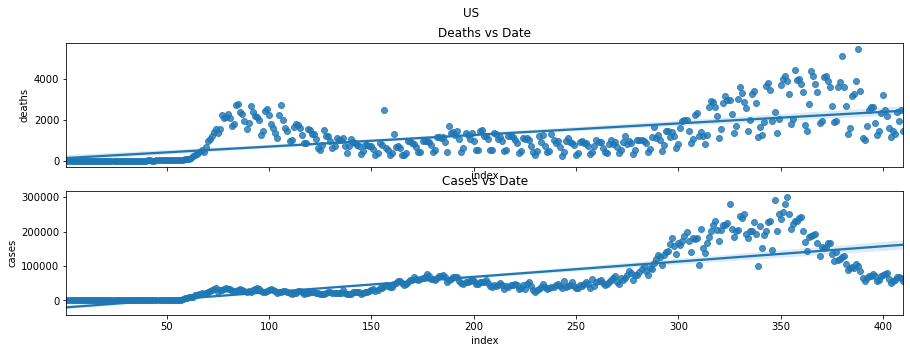

In [5]:
titleaa = 'US' 
titlea = 'Deaths vs Date'
titleb = 'Cases vs Date'
# Set default Seaborn style
fig, axes = plt.subplots(2,1 , figsize=(15, 5), sharex= True)
fig.suptitle(titleaa)
sns.regplot(ax=axes[0], x = 'index', y= 'deaths', data = df_all_1)
axes[0].set_title(titlea)
sns.regplot(ax=axes[1], x = 'index', y= 'cases', data = df_all_1)
axes[1].set_title(titleb)
plt.show()

## Regression Model on US Deaths & Cases

In [6]:
x = df_all_1.iloc[1:,0].values.reshape(-1,1)
y = df_all_1.iloc[1:,2].values.reshape(-1,1)
y2 = df_all_1.iloc[1:,3].values.reshape(-1,1)

max_x = x.max()
x_future = max_x + 10
x2 = np.arange(max_x,x_future).reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=42)

# Create training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y2,test_size = 0.3, random_state=42)

**Ensamble Model (LR, GBR, RFR)**

In [7]:
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

ereg = ereg.fit(X_train, y_train)
y_pred_death = ereg.predict(X_test)
x_22 = ereg.predict(x2)
x_22 = np.rint(x_22)
print('################# Deaths in next 10 Days #################')
print(x_22)

print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, y_pred_death)))

ereg = ereg.fit(X_train2, y_train2)
y_pred_cases = ereg.predict(X_test2)
x_22 = ereg.predict(x2)
x_22 = np.rint(x_22)
print('################# Cases in next 10 Days #################')
print(x_22)
print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y_test2, y_pred_cases)))

################# Deaths in next 10 Days #################
[1979. 1981. 1983. 1985. 1987. 1989. 1991. 1993. 1995. 1997.]
#########Deaths Model###################
Mean Absolute Error: 473.6590046250209
Mean Squared Error: 395133.9835453485
Root Mean Squared Error: 628.5968370468853
R^2: 0.7918174224858638
################# Cases in next 10 Days #################
[101916. 102080. 102244. 102407. 102571. 102735. 102899. 103062. 103226.
 103390.]
#########Cases Model###################
Mean Absolute Error: 17364.908205027576
Mean Squared Error: 747559418.6589621
Root Mean Squared Error: 27341.53285130448
R^2: 0.9088787710646402


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**Linear Regression**

################# Deaths in next 10 Days #################
[[2519.]
 [2526.]
 [2532.]
 [2538.]
 [2544.]
 [2550.]
 [2556.]
 [2563.]
 [2569.]
 [2575.]]
################# Cases in next 10 Days #################
[[172935.]
 [173427.]
 [173918.]
 [174409.]
 [174900.]
 [175391.]
 [175882.]
 [176374.]
 [176865.]
 [177356.]]


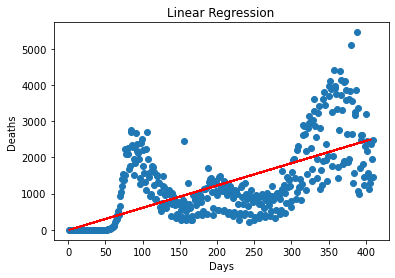

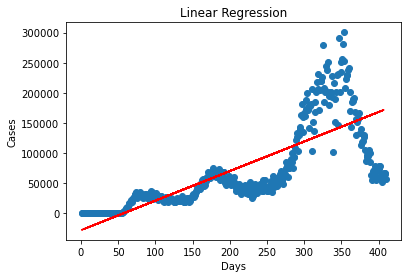

#########Deaths Model###################
Mean Absolute Error: 654.1383644342138
Mean Squared Error: 724619.9858077903
Root Mean Squared Error: 851.2461370295846
R^2: 0.562071579465295
#########Cases Model###################
Mean Absolute Error: 36276.3407800625
Mean Squared Error: 2529454530.012776
Root Mean Squared Error: 50293.68280423274
R^2: 0.6414482141642336


In [8]:
l1 = LinearRegression()
l1.fit(X_train,y_train)
y_pred_death = l1.predict(X_test)

print('################# Deaths in next 10 Days #################')
x_22 = l1.predict(x2)
x_22 = np.rint(x_22)
print(x_22)

l1.fit(X_train2,y_train2)
y_pred_cases = l1.predict(X_test2)
print('################# Cases in next 10 Days #################')
x_22 = l1.predict(x2)
x_22 = np.rint(x_22)
print(x_22)


plt.scatter(x,y)
plt.plot(X_test,y_pred_death,color='red')
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()
plt.scatter(x,y2)
plt.plot(X_test2,y_pred_cases,color='red')
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()


print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y_test2, y_pred_cases)))

################# Deaths in next 10 Days #################
[[2385.]
 [2362.]
 [2338.]
 [2314.]
 [2288.]
 [2261.]
 [2233.]
 [2204.]
 [2175.]
 [2144.]]
################# Cases in next 10 Days #################
[[40207.]
 [35320.]
 [30327.]
 [25228.]
 [20021.]
 [14705.]
 [ 9279.]
 [ 3742.]
 [-1907.]
 [-7670.]]


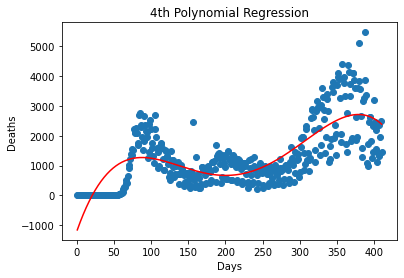

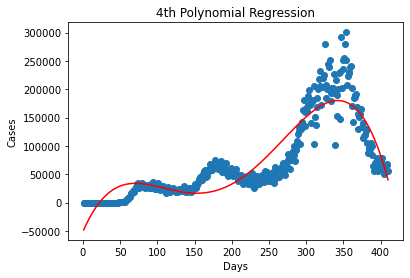

#########Deaths Model###################
Mean Absolute Error: 568.0528169503772
Mean Squared Error: 495272.0489059201
Root Mean Squared Error: 703.755674155399
R^2: 0.7566264830291344
#########Cases Model###################
Mean Absolute Error: 24427.838435961843
Mean Squared Error: 995835062.2657006
Root Mean Squared Error: 31556.85444187523
R^2: 0.8915276414037503


In [9]:
max_x = x.max()
x_future = max_x + 10
x2 = np.arange(max_x,x_future).reshape(-1,1)

poly_reg = PolynomialFeatures(degree=4)

x = df_all_1.iloc[1:,0].values.reshape(-1,1)
poly_x = poly_reg.fit_transform(x)

y = df_all_1.iloc[1:,2].values.reshape(-1,1)
y2 = df_all_1.iloc[1:,3].values.reshape(-1,1)

l1 = LinearRegression()
l1.fit(poly_x,y)
y_pred_death = l1.predict(poly_x)

print('################# Deaths in next 10 Days #################')
x_22 = l1.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)

l1.fit(poly_x,y2)
y_pred_cases = l1.predict(poly_x)
print('################# Cases in next 10 Days #################')
x_22 = l1.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)


plt.scatter(x,y)
plt.plot(x,y_pred_death,color='red')
plt.title('4th Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()
plt.scatter(x,y2)
plt.plot(x,y_pred_cases,color='red')
plt.title('4th Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y2, y_pred_cases)))

################# Deaths in next 10 Days #################
[[1567.]
 [1505.]
 [1442.]
 [1379.]
 [1316.]
 [1253.]
 [1190.]
 [1127.]
 [1065.]
 [1003.]]
################# Cases in next 10 Days #################
[[46018.]
 [46175.]
 [46729.]
 [47704.]
 [49127.]
 [51022.]
 [53416.]
 [56337.]
 [59815.]
 [63876.]]


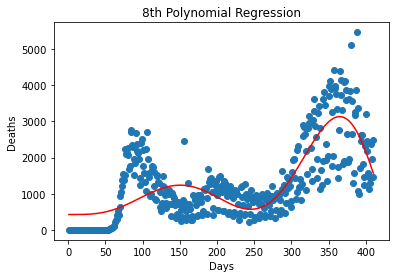

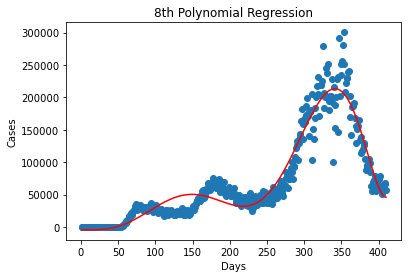

#########Deaths Model###################
Mean Absolute Error: 549.2438845654485
Mean Squared Error: 469325.63695908146
Root Mean Squared Error: 685.0734536960847
R^2: 0.7712849333086838
#########Cases Model###################
Mean Absolute Error: 15199.130471733071
Mean Squared Error: 428187766.9191891
Root Mean Squared Error: 20692.69839627469
R^2: 0.9548704890331157


In [10]:
max_x = x.max()
x_future = max_x + 10
x2 = np.arange(max_x,x_future).reshape(-1,1)

poly_reg = PolynomialFeatures(degree=8)

x = df_all_1.iloc[1:,0].values.reshape(-1,1)
poly_x = poly_reg.fit_transform(x)

y = df_all_1.iloc[1:,2].values.reshape(-1,1)
y2 = df_all_1.iloc[1:,3].values.reshape(-1,1)

l1 = LinearRegression()
l1.fit(poly_x,y)
y_pred_death = l1.predict(poly_x)

print('################# Deaths in next 10 Days #################')
x_22 = l1.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)

l1.fit(poly_x,y2)
y_pred_cases = l1.predict(poly_x)
print('################# Cases in next 10 Days #################')
x_22 = l1.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)


plt.scatter(x,y)
plt.plot(x,y_pred_death,color='red')
plt.title('8th Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()
plt.scatter(x,y2)
plt.plot(x,y_pred_cases,color='red')
plt.title('8th Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y2, y_pred_cases)))

**Multi Layer Perceptron**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


################# Deaths in next 10 Days #################
[2452. 2458. 2464. 2470. 2476. 2482. 2488. 2494. 2500. 2506.]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


################# Cases in next 10 Days #################
[167991. 168400. 168810. 169219. 169629. 170038. 170448. 170857. 171267.
 171676.]


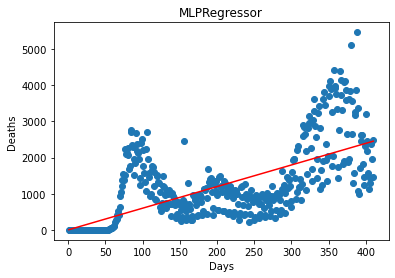

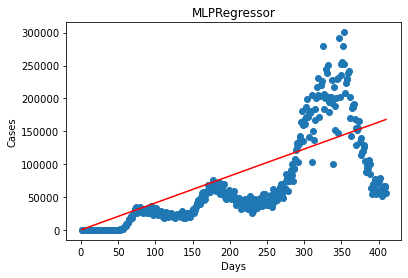

#########Deaths Model###################
Mean Absolute Error: 643.7542496520807
Mean Squared Error: 715925.3410565531
Root Mean Squared Error: 846.1237149829527
R^2: 0.618075086318343
#########Cases Model###################
Mean Absolute Error: 37107.673088236064
Mean Squared Error: 2283575797.739305
Root Mean Squared Error: 47786.77429728131
R^2: 0.7276673828328276


In [11]:
x = df_all_1.iloc[1:,0].values.reshape(-1,1)
y = df_all_1.iloc[1:,2].values.reshape(-1,1)
y2 = df_all_1.iloc[1:,3].values.reshape(-1,1)

max_x = x.max()
x_future = max_x + 10
x2 = np.arange(max_x,x_future).reshape(-1,1)


regr = MLPRegressor(random_state=1, hidden_layer_sizes=(100, 100,100,100, 100,100), max_iter=500).fit(x, y)
y_pred_death = regr.predict(x)

print('################# Deaths in next 10 Days #################')
x_22 = regr.predict(x2)
x_22 = np.rint(x_22)
print(x_22)


regr = MLPRegressor(random_state=1, hidden_layer_sizes=(100, 100,100,100, 100,100), max_iter=500).fit(x, y2)
y_pred_cases = regr.predict(x)
print('################# Cases in next 10 Days #################')
x_22 = regr.predict(x2)
x_22 = np.rint(x_22)
print(x_22)

plt.scatter(x,y)
plt.plot(x,y_pred_death,color='red')
plt.title('MLPRegressor')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()
plt.scatter(x,y2)
plt.plot(x,y_pred_cases,color='red')
plt.title('MLPRegressor')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y2, y_pred_cases)))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


################# Deaths in next 10 Days #################
[4956. 4997. 5038. 5079. 5121. 5163. 5205. 5247. 5290. 5333.]
################# Cases in next 10 Days #################
[314991. 317308. 319637. 321977. 324328. 326691. 329065. 331450. 333847.
 336256.]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


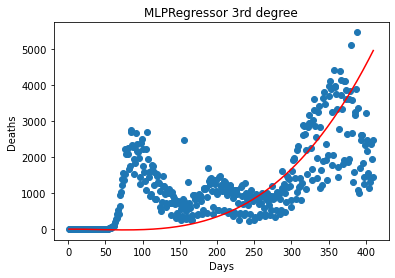

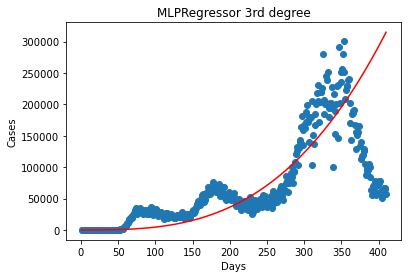

#########Deaths Model###################
Mean Absolute Error: 780.9556514692223
Mean Squared Error: 1200769.4728076472
Root Mean Squared Error: 1095.7962734047087
R^2: nan
#########Cases Model###################
Mean Absolute Error: 38317.23199249014
Mean Squared Error: 4333643935.639373
Root Mean Squared Error: 65830.41801203584
R^2: 0.32727780711527554


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in sqrt


In [12]:
poly_reg = PolynomialFeatures(degree=3)

x = df_all_1.iloc[1:,0].values.reshape(-1,1)
y = df_all_1.iloc[1:,2].values.reshape(-1,1)
y2 = df_all_1.iloc[1:,3].values.reshape(-1,1)



poly_x = poly_reg.fit_transform(x)

regr = MLPRegressor(random_state=1, hidden_layer_sizes=(25, 57,57,34), max_iter=500).fit(poly_x, y)
y_pred_death = regr.predict(poly_x)

print('################# Deaths in next 10 Days #################')
x_22 = regr.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)


regr = MLPRegressor(random_state=1, hidden_layer_sizes=(100, 100), max_iter=500).fit(poly_x, y2)
y_pred_cases = regr.predict(poly_x)
print('################# Cases in next 10 Days #################')
x_22 = regr.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)

plt.scatter(x,y)
plt.plot(x,y_pred_death,color='red')
plt.title('MLPRegressor 3rd degree')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()
plt.scatter(x,y2)
plt.plot(x,y_pred_cases,color='red')
plt.title('MLPRegressor 3rd degree')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y2, y_pred_cases)))

**Random Foreset**

In [13]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=6,
            min_samples_leaf=0.009,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)
y_pred_death = dt.predict(X_test)
y_pred_1 = dt.predict(X_test)
print('################# Deaths in next 10 Days #################')
x_22 = dt.predict(x2)
x_22 = np.rint(x_22)
print(x_22)

dt.fit(X_train2,y_train2)
y_pred_cases = dt.predict(X_test2)
print('################# Cases in next 10 Days #################')
x_22 = dt.predict(x2)
x_22 = np.rint(x_22)
print(x_22)

print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y_test2, y_pred_cases)))

################# Deaths in next 10 Days #################
[1964. 1964. 1964. 1964. 1964. 1964. 1964. 1964. 1964. 1964.]
################# Cases in next 10 Days #################
[60664. 60664. 60664. 60664. 60664. 60664. 60664. 60664. 60664. 60664.]
#########Deaths Model###################
Mean Absolute Error: 428.6784196972802
Mean Squared Error: 466234.9665011657
Root Mean Squared Error: 682.8140057886669
R^2: 0.7482326775271656
#########Cases Model###################
Mean Absolute Error: 7857.109273500703
Mean Squared Error: 249535203.50026938
Root Mean Squared Error: 15796.683306956224
R^2: 0.9705354529703707


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


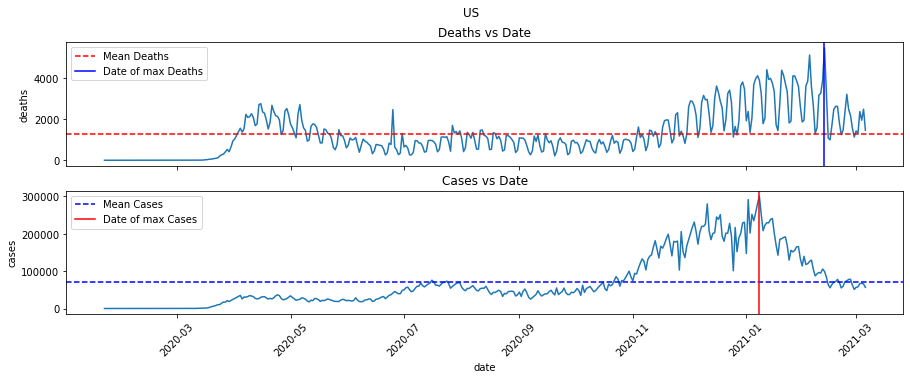

In [14]:
df_all = df
df_all = df_all.groupby(['date'])[['deaths','cases']].sum()
df_alll = df_all

df_alll = df_alll.diff(axis=0)

df_alll1 = df_alll.reset_index()

mean1 = df_alll1['deaths'].mean()
mean2 = df_alll1['cases'].mean()


a = df_alll.idxmax()


titleaa = 'US' 
titlea = 'Deaths vs Date'
titleb = 'Cases vs Date'
# Set default Seaborn style
fig, axes = plt.subplots(2,1 , figsize=(15, 5), sharex=True)
fig.suptitle(titleaa)
sns.lineplot(ax=axes[0], x = 'date', y= 'deaths', data = df_alll1)
axes[0].set_title(titlea)
sns.lineplot(ax=axes[1], x = 'date', y= 'cases', data = df_alll1)
axes[1].set_title(titleb)

axes[0].axhline(mean1, color='r', linestyle='--', label = 'Mean Deaths')
axes[1].axhline(mean2, color='b', linestyle='--', label = 'Mean Cases')

axes[0].axvline(a[0], color='B', linestyle='-', label = 'Date of max Deaths')
axes[1].axvline(a[1], color='R', linestyle='-', label = 'Date of max Cases')

# Customize the labels and limits
axes[0].legend()
axes[1].legend()
plt.xticks(rotation=45)
# Show TimeSeries
plt.show()

## Regression Model on Cook County IL Deaths & Cases

In [15]:
df_all_12 = df
df_all_12 = df_all_12[df_all_12['state'] == 'Illinois']
df_all_12 = df_all_12[df_all_12['county'] == 'Cook']
df_all_12 = df_all_12.groupby(['date'])[['deaths','cases']].sum()
df_all_123 = df_all_12

df_all_123 = df_all_123.diff(axis = 0)
df_all_123 = df_all_123.reset_index()
df_all_123 = df_all_123.reset_index()
date = df_all_123[df_all_123['date'] == df_all_123['date'].max()]

print(df_all_123.tail())
print(date)

     index       date  deaths   cases
403    403 2021-03-02    31.0   501.0
404    404 2021-03-03     6.0   708.0
405    405 2021-03-04    11.0   741.0
406    406 2021-03-05    11.0   546.0
407    407 2021-03-06    19.0  1117.0
     index       date  deaths   cases
407    407 2021-03-06    19.0  1117.0


################# Deaths in next 10 Days #################
[[30.]
 [31.]
 [31.]
 [31.]
 [31.]
 [31.]
 [31.]
 [31.]
 [31.]
 [31.]]
################# Cases in next 10 Days #################
[[2226.]
 [2231.]
 [2236.]
 [2241.]
 [2246.]
 [2251.]
 [2257.]
 [2262.]
 [2267.]
 [2272.]]


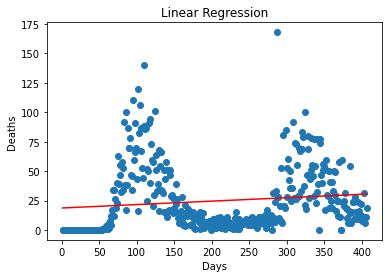

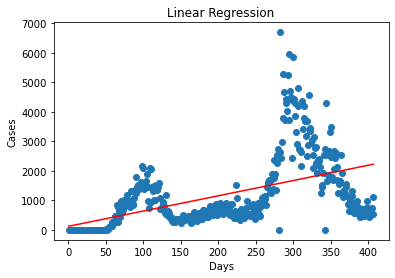

#########Deaths Model###################
Mean Absolute Error: 21.409675874981307
Mean Squared Error: 749.0088431333791
Root Mean Squared Error: 27.36802592686179
R^2: 0.12415821429218589
#########Cases Model###################
Mean Absolute Error: 759.6940306625556
Mean Squared Error: 1078520.4275070531
Root Mean Squared Error: 1038.5183809192079
R^2: 0.5050010842130571


In [16]:
x = df_all_123.iloc[1:,0].values.reshape(-1,1)
y = df_all_123.iloc[1:,2].values.reshape(-1,1)
y2 = df_all_123.iloc[1:,3].values.reshape(-1,1)

max_x = x.max()
x_future = max_x + 10
x2 = np.arange(max_x,x_future).reshape(-1,1)

l1 = LinearRegression()
l1.fit(x,y)
y_pred_death = l1.predict(x)

print('################# Deaths in next 10 Days #################')
x_22 = l1.predict(x2)
x_22 = np.rint(x_22)
print(x_22)

l1.fit(x,y2)
y_pred_cases = l1.predict(x)
print('################# Cases in next 10 Days #################')
x_22 = l1.predict(x2)
x_22 = np.rint(x_22)
print(x_22)


plt.scatter(x,y)
plt.plot(x,y_pred_death,color='red')
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()
plt.scatter(x,y2)
plt.plot(x,y_pred_cases,color='red')
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()


print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y2, y_pred_cases)))

################# Deaths in next 10 Days #################
[[  1.]
 [ -1.]
 [ -3.]
 [ -4.]
 [ -6.]
 [ -8.]
 [-10.]
 [-12.]
 [-14.]
 [-16.]]
################# Cases in next 10 Days #################
[[ -727.]
 [ -837.]
 [ -949.]
 [-1063.]
 [-1180.]
 [-1299.]
 [-1420.]
 [-1543.]
 [-1669.]
 [-1797.]]


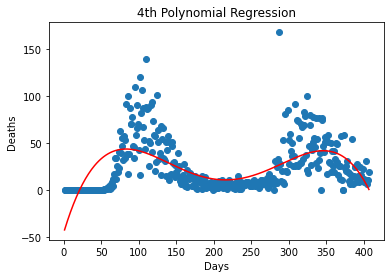

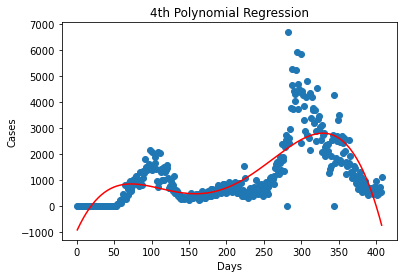

#########Deaths Model###################
Mean Absolute Error: 16.456563984421088
Mean Squared Error: 513.8208972213337
Root Mean Squared Error: 22.667617810906677
R^2: 0.5697137682296703
#########Cases Model###################
Mean Absolute Error: 548.350695232464
Mean Squared Error: 612872.2942588585
Root Mean Squared Error: 782.8616060702291
R^2: 0.7593855831811963


In [17]:
max_x = x.max()
x_future = max_x + 10
x2 = np.arange(max_x,x_future).reshape(-1,1)

poly_reg = PolynomialFeatures(degree=4)

x = df_all_123.iloc[1:,0].values.reshape(-1,1)
poly_x = poly_reg.fit_transform(x)

y = df_all_123.iloc[1:,2].values.reshape(-1,1)
y2 = df_all_123.iloc[1:,3].values.reshape(-1,1)

l1 = LinearRegression()
l1.fit(poly_x,y)
y_pred_death = l1.predict(poly_x)

print('################# Deaths in next 10 Days #################')
x_22 = l1.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)

l1.fit(poly_x,y2)
y_pred_cases = l1.predict(poly_x)
print('################# Cases in next 10 Days #################')
x_22 = l1.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)


plt.scatter(x,y)
plt.plot(x,y_pred_death,color='red')
plt.title('4th Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()
plt.scatter(x,y2)
plt.plot(x,y_pred_cases,color='red')
plt.title('4th Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y2, y_pred_cases)))

################# Deaths in next 10 Days #################
[[ 40.]
 [ 45.]
 [ 51.]
 [ 57.]
 [ 63.]
 [ 70.]
 [ 78.]
 [ 86.]
 [ 95.]
 [104.]]
################# Cases in next 10 Days #################
[[1759.]
 [1977.]
 [2213.]
 [2469.]
 [2745.]
 [3042.]
 [3361.]
 [3702.]
 [4067.]
 [4457.]]


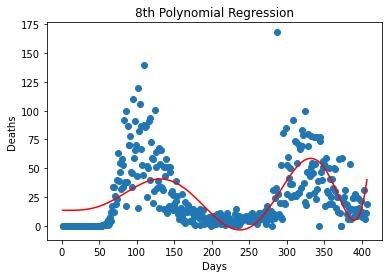

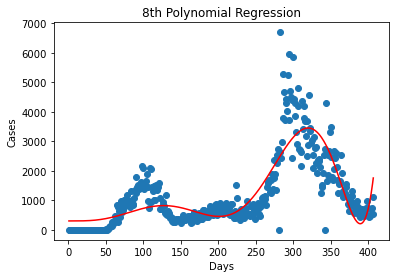

#########Deaths Model###################
Mean Absolute Error: 15.899490056899479
Mean Squared Error: 475.6375792490203
Root Mean Squared Error: 21.809116883748874
R^2: 0.6121816660135649
#########Cases Model###################
Mean Absolute Error: 472.99416987682264
Mean Squared Error: 451648.75933847844
Root Mean Squared Error: 672.0481823042738
R^2: 0.8294754462162748


In [18]:
max_x = x.max()
x_future = max_x + 10
x2 = np.arange(max_x,x_future).reshape(-1,1)

poly_reg = PolynomialFeatures(degree=8)

x = df_all_123.iloc[1:,0].values.reshape(-1,1)
poly_x = poly_reg.fit_transform(x)

y = df_all_123.iloc[1:,2].values.reshape(-1,1)
y2 = df_all_123.iloc[1:,3].values.reshape(-1,1)

l1 = LinearRegression()
l1.fit(poly_x,y)
y_pred_death = l1.predict(poly_x)

print('################# Deaths in next 10 Days #################')
x_22 = l1.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)

l1.fit(poly_x,y2)
y_pred_cases = l1.predict(poly_x)
print('################# Cases in next 10 Days #################')
x_22 = l1.predict(poly_reg.fit_transform(x2))
x_22 = np.rint(x_22)
print(x_22)


plt.scatter(x,y)
plt.plot(x,y_pred_death,color='red')
plt.title('8th Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()
plt.scatter(x,y2)
plt.plot(x,y_pred_cases,color='red')
plt.title('8th Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

print('#########Deaths Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_death))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_death))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_death)))
print('R^2:', np.sqrt(metrics.r2_score(y, y_pred_death)))

print('#########Cases Model###################')
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred_cases))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred_cases))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred_cases)))
print('R^2:', np.sqrt(metrics.r2_score(y2, y_pred_cases)))


## Top 30 Counties with Most Covid Cases

In [19]:
df2ac.sort_values('cases')

state          county   deaths    cases
3216     California            Kern    942.0   104181
3217      Wisconsin       Milwaukee   1284.0   107631
3218       New York     Westchester   2122.0   109950
3219        Arizona            Pima   2261.0   110345
3220     California     Santa Clara   1823.0   111638
3221           Ohio        Franklin   1251.0   112955
3222  Massachusetts       Middlesex   3482.0   113262
3223        Florida    Hillsborough   1535.0   113332
3224        Florida          Orange   1124.0   116128
3225   Pennsylvania    Philadelphia   3173.0   119874
3226        Florida      Palm Beach   2508.0   123031
3227          Texas         El Paso   2398.0   125250
3228           Utah       Salt Lake    780.0   139779
3229       New York          Nassau   2951.0   151970
3230       New York         Suffolk   3120.0   165879
3231          Texas           Bexar   3032.0   197933
3232        Florida         Broward   2455.0   198995
3233         Nevada           Clark   3930.0   228492
3234          Texas         Tarrant   2967.0   244632
3235     California          Orange   4173.0   262550
3236     California       San Diego   3385.0   262844
3237          Texas          Dallas   3547.0   284010
3238     California  San Bernardino   3137.0   287782
3239     California       Riverside   3892.0   290904
3240          Texas          Harris   5296.0   358505
3241        Florida      Miami-Dade   5554.0   418410
3242       Illinois            Cook  10002.0   478498
3243        Arizona        Maricopa   9314.0   515211
3244       New York   New York City  29760.0   748241
3245     California     Los Angeles  22008.0  1202513

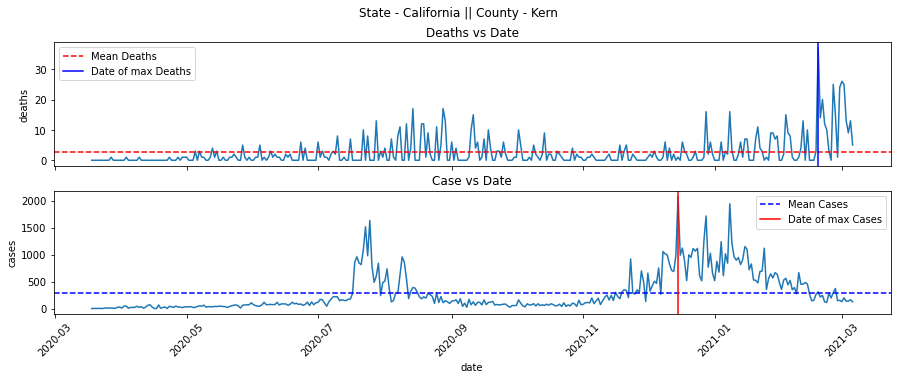

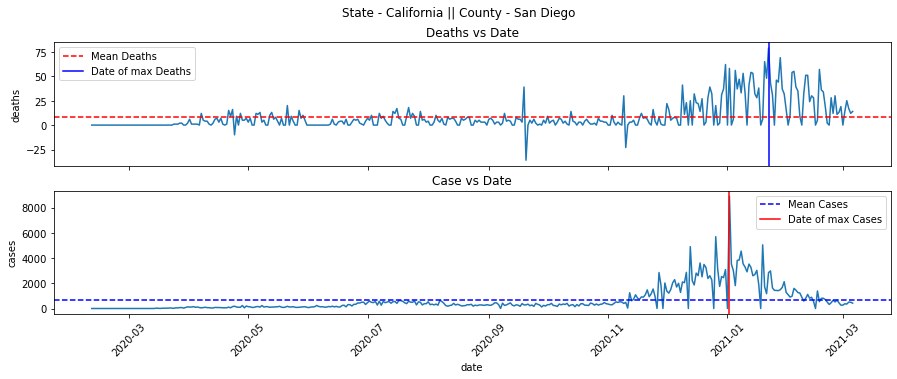

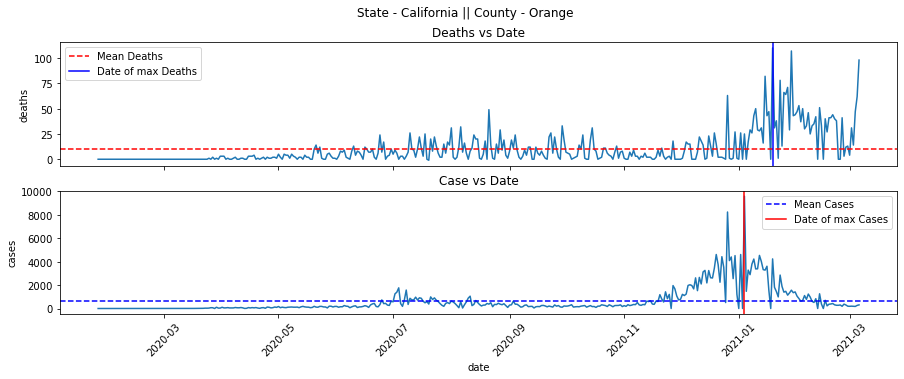

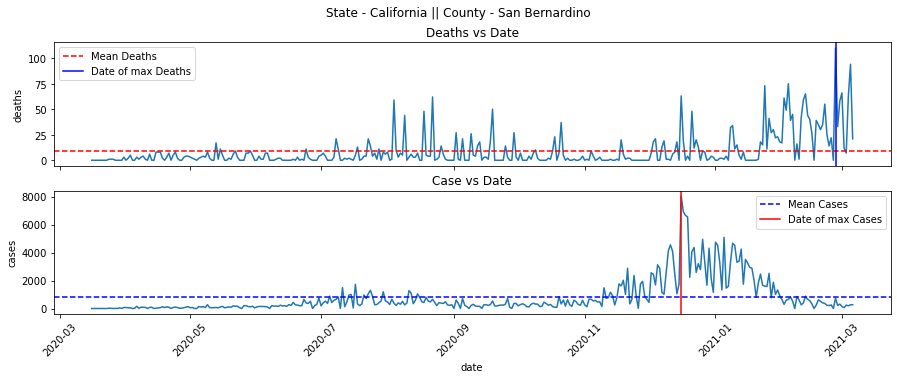

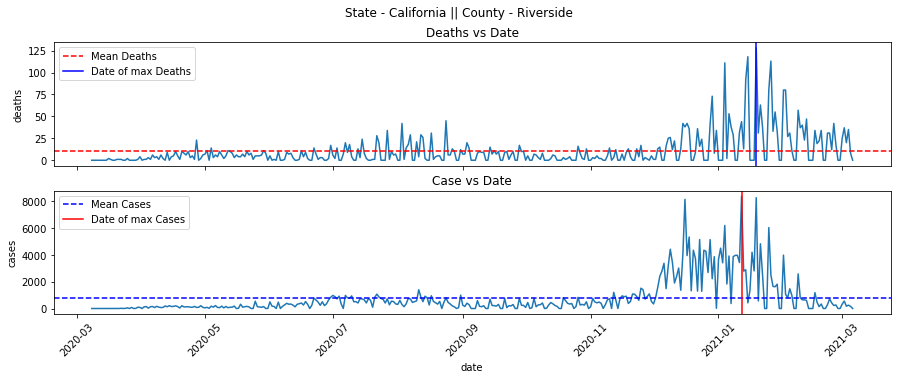

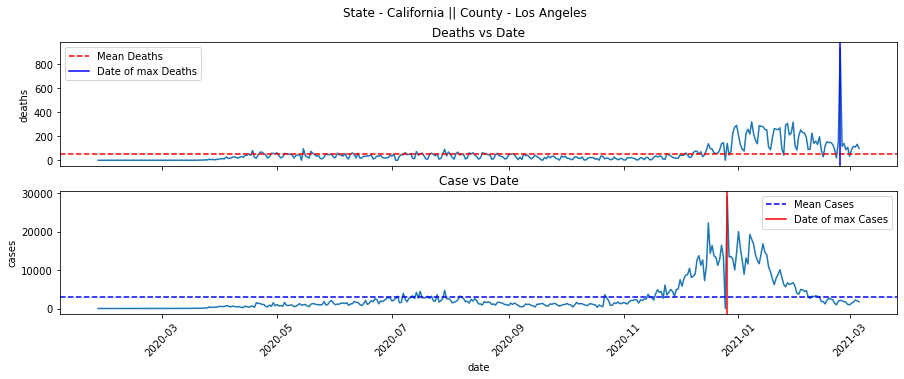

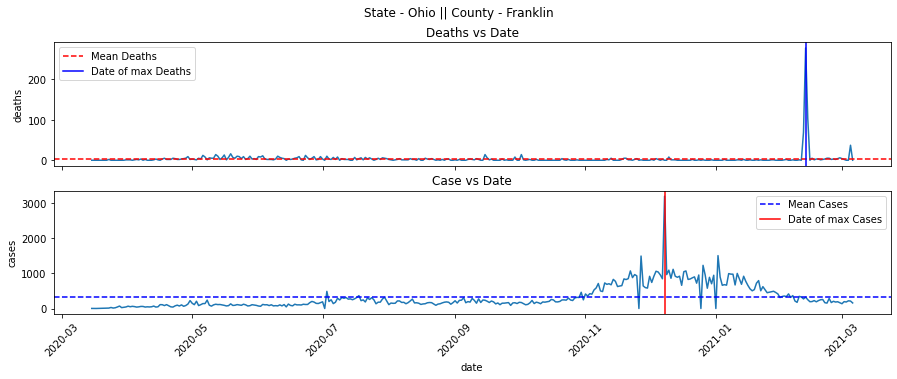

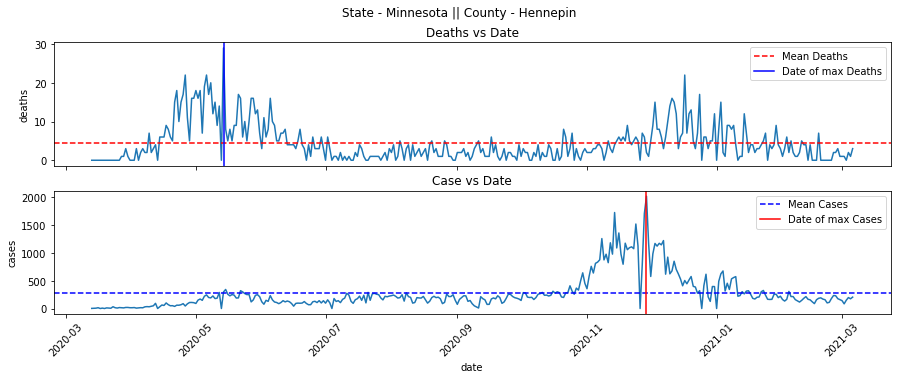

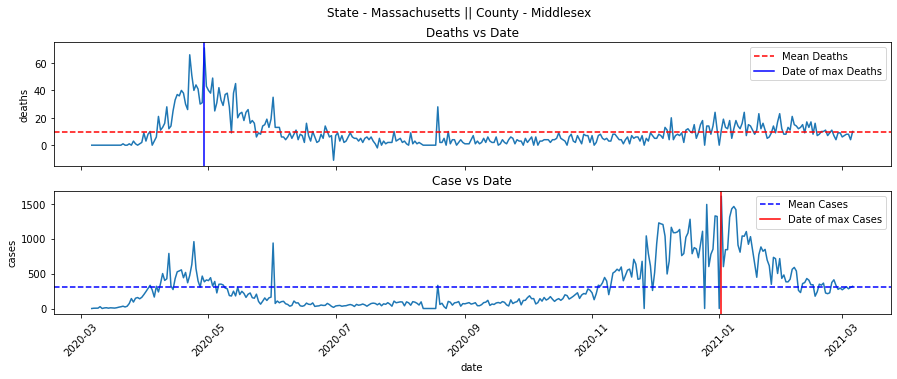

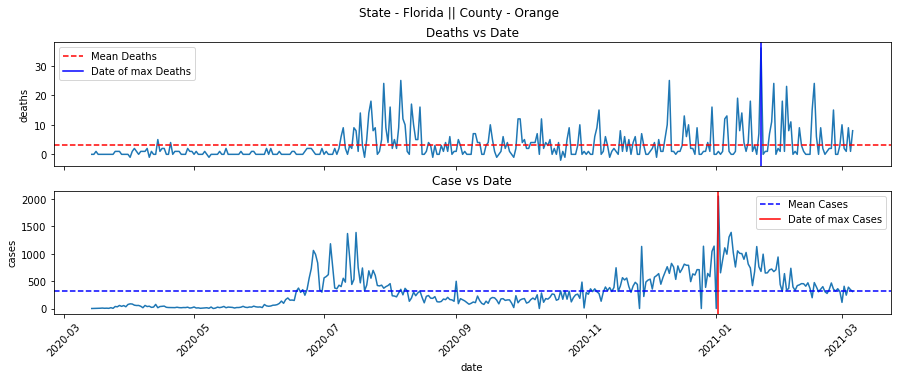

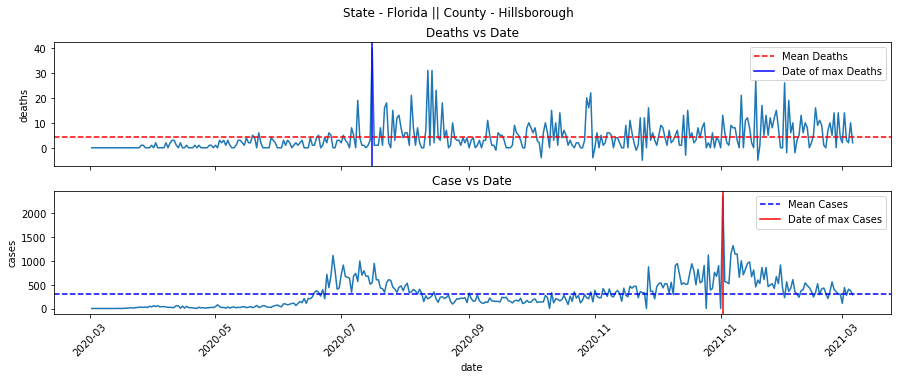

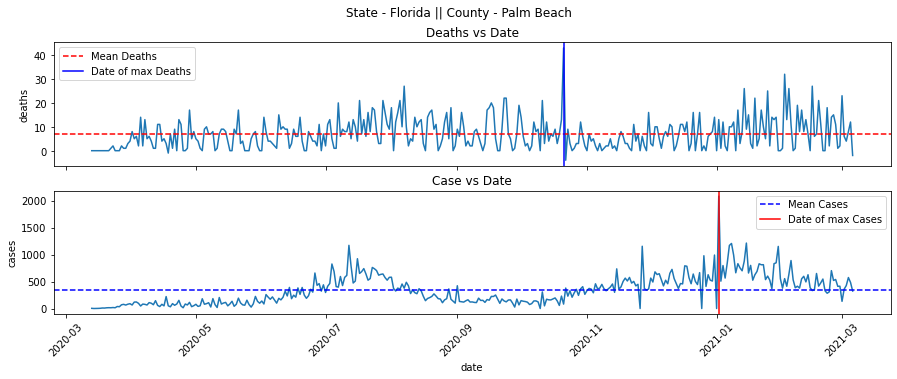

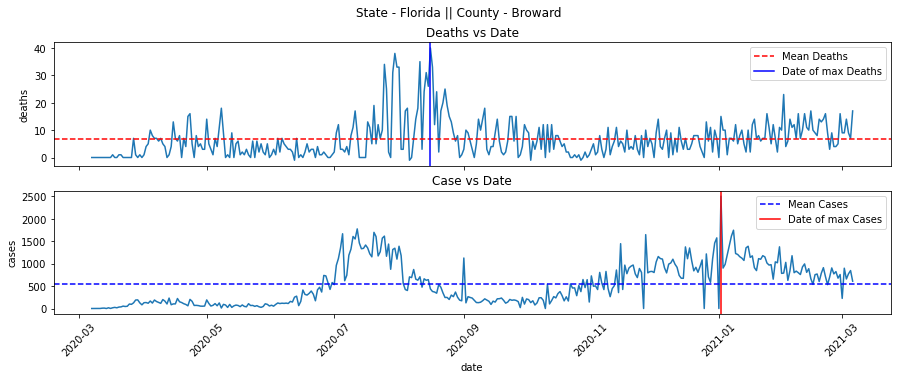

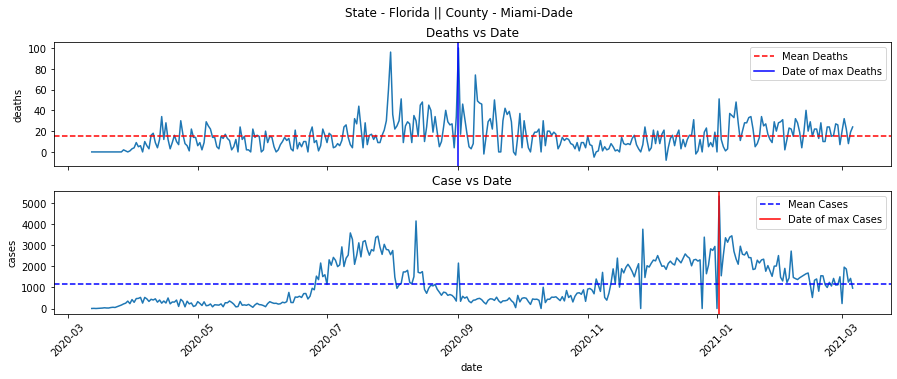

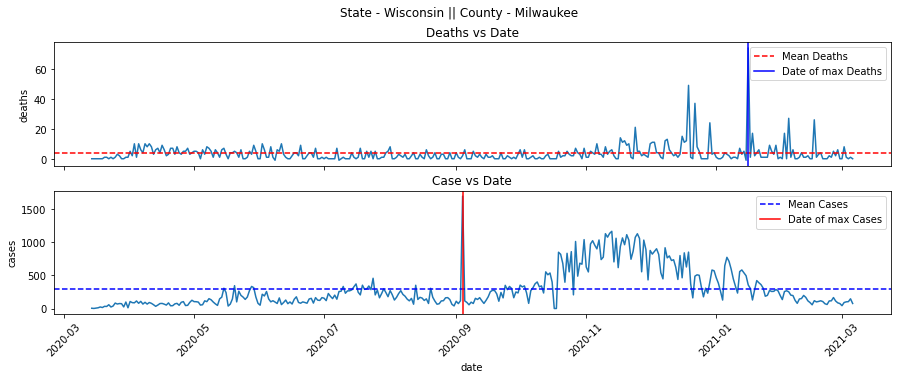

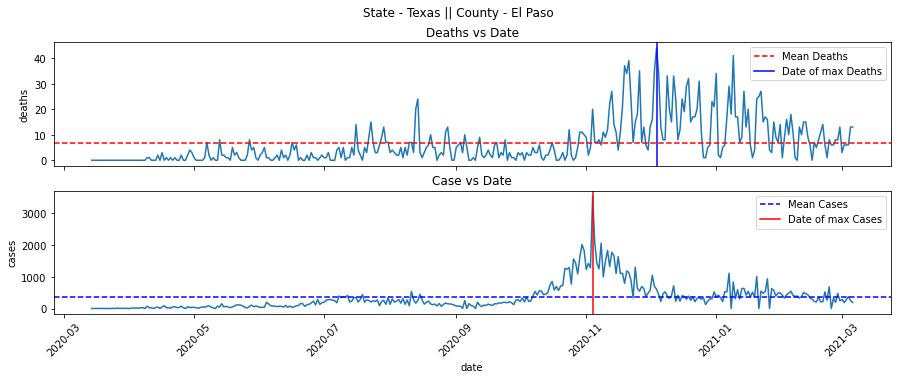

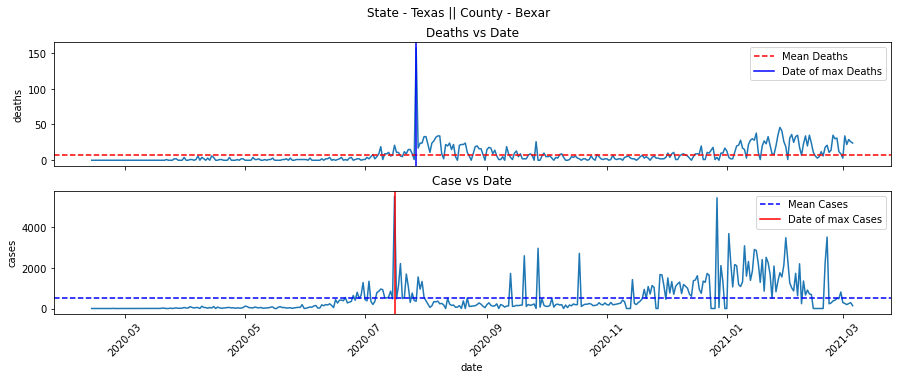

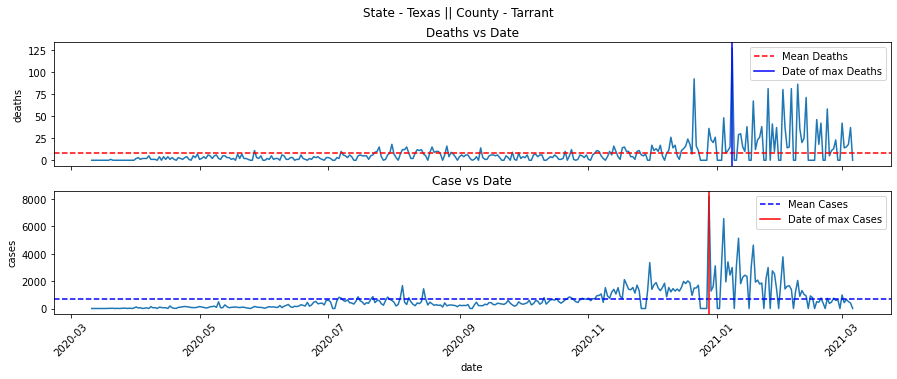

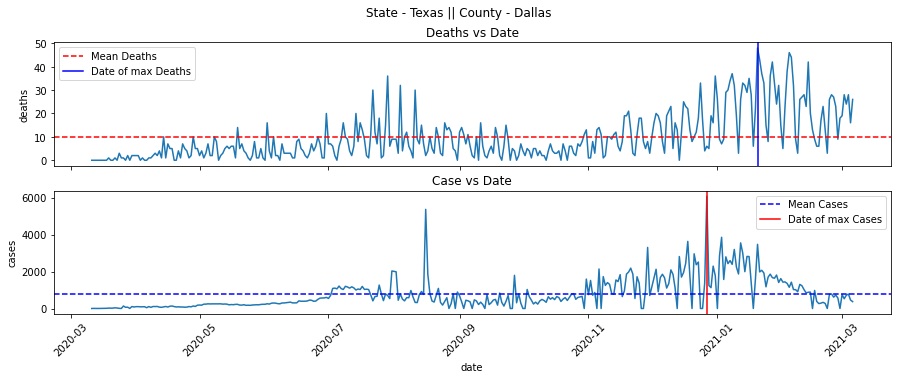

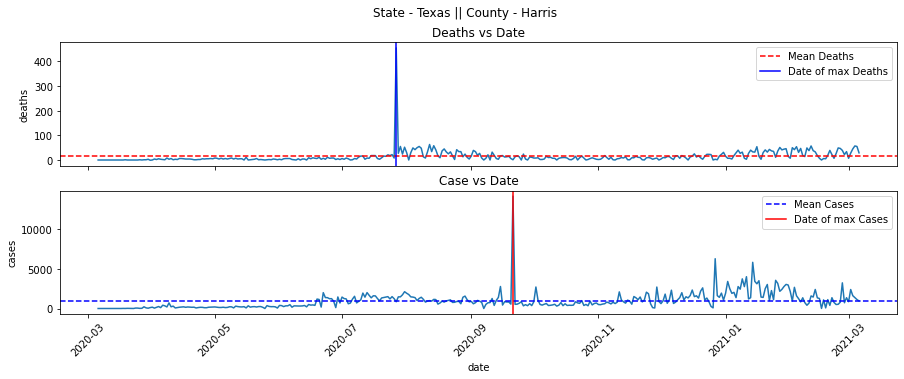

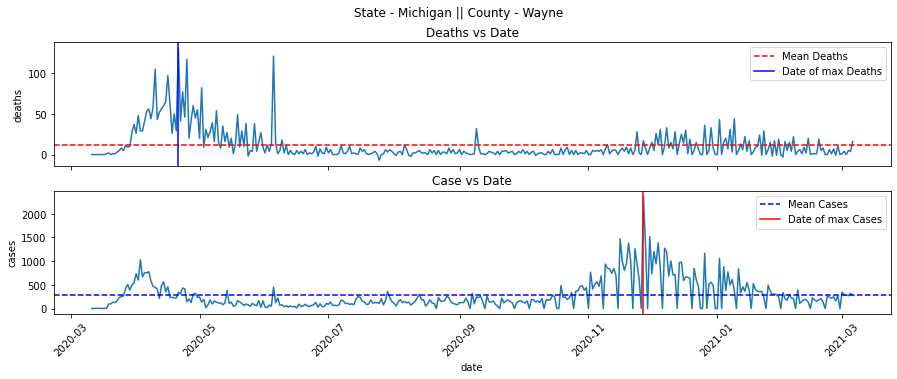

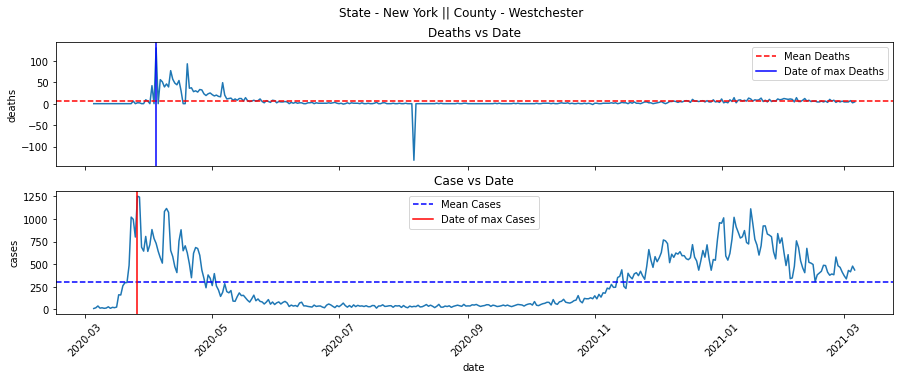

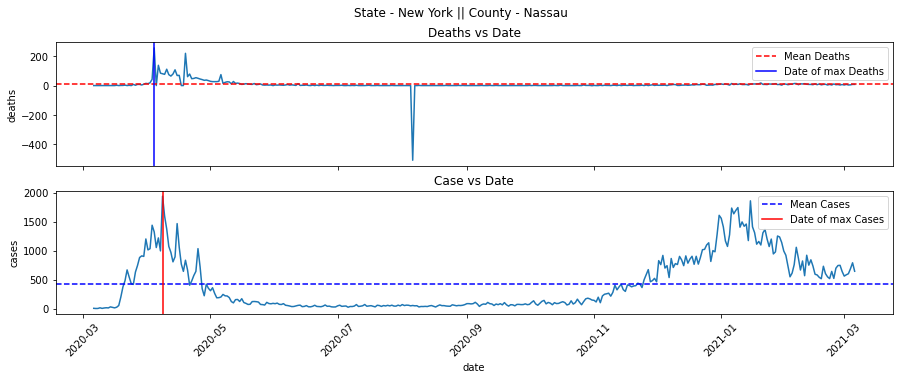

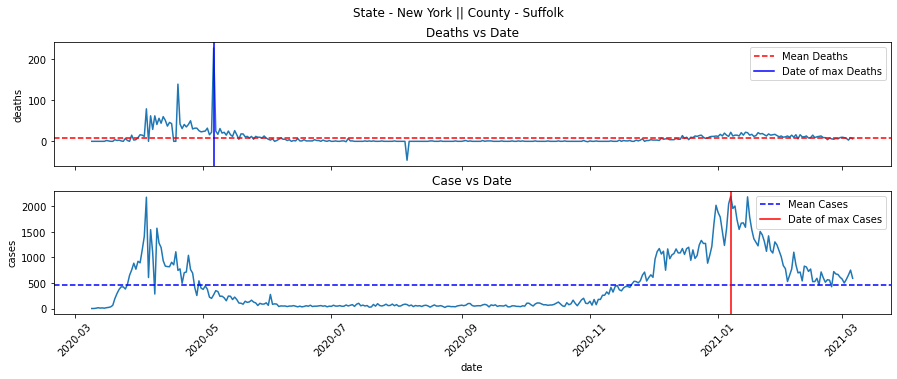

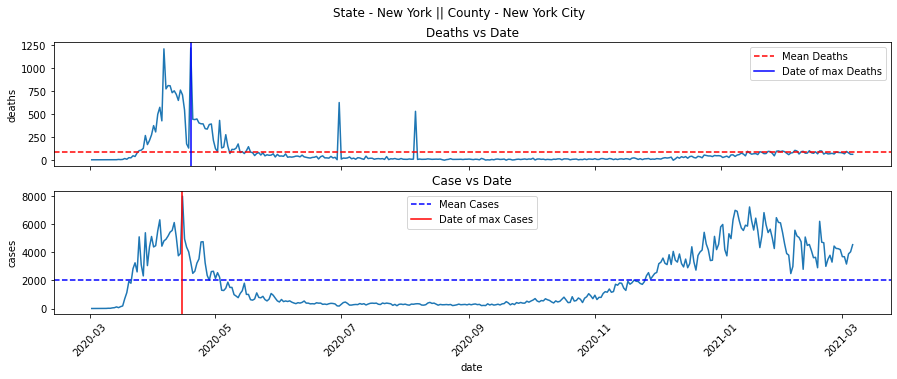

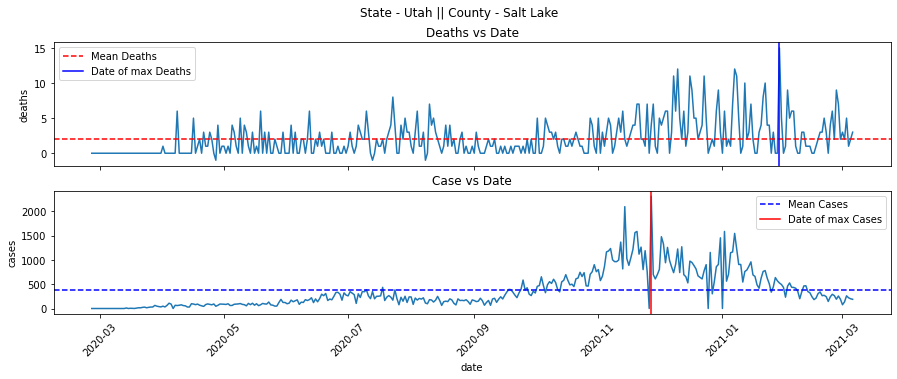

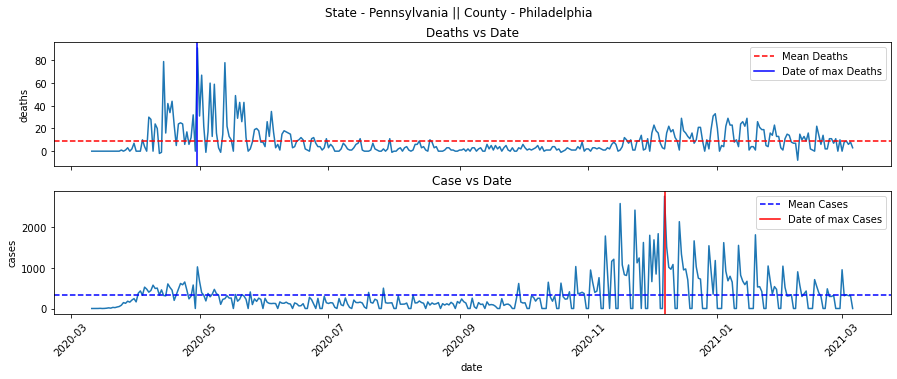

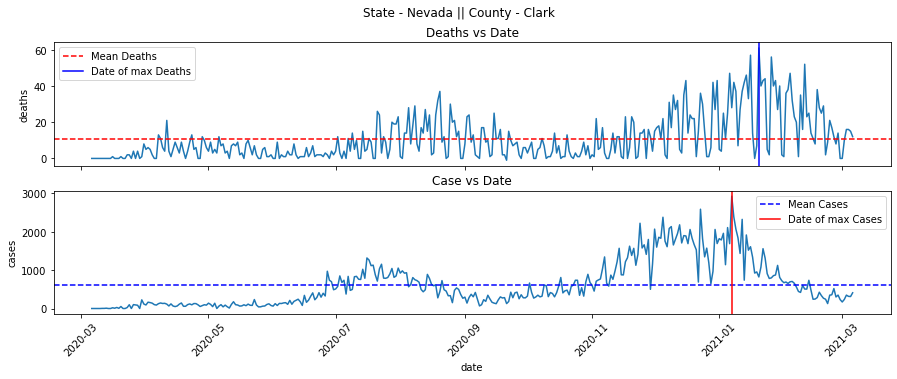

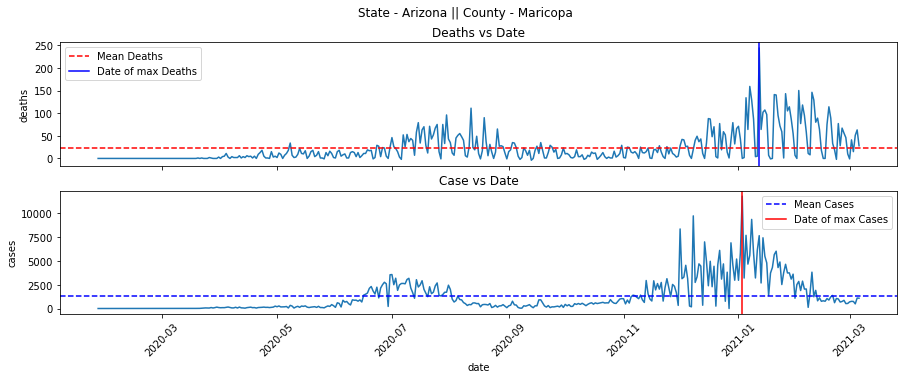

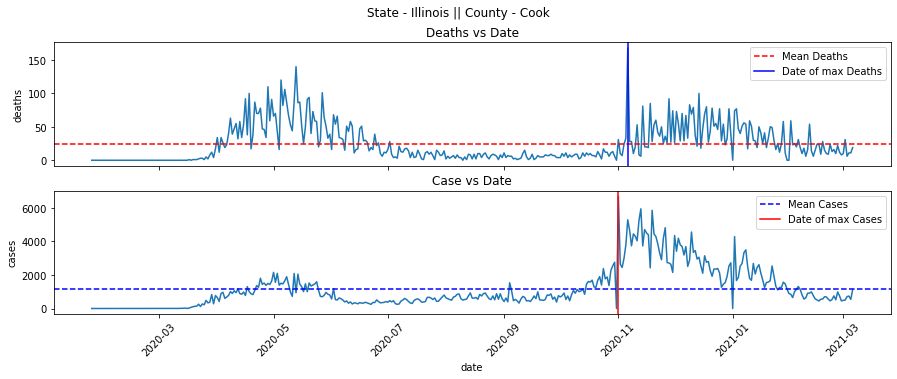

In [20]:
for key, values in d2.items():
    df22 = df2[df2['state'] == key]
    for a in values:
        df33 = df22[df22['county'] == a]
                
        df33 = df33.groupby(['state','county','date'])[['deaths','cases']].sum()
        df33 = df33.diff(axis=0)
        df333 = df33[df33['deaths'] >= 0]
        df333 = df33[df33['cases'] >= 0]
        
        aa = df33.idxmax()
        mean1 = df33['deaths'].mean()
        mean2 = df33['cases'].mean()
        dff333 = df333.reset_index()


        titleaa = 'State - ' + key +' || County - ' + a 
        titlea = 'Deaths vs Date'
        titleb = 'Case vs Date'
        # Set default Seaborn style
        fig, axes = plt.subplots(2,1 , figsize=(15, 5), sharex=True)
        fig.suptitle(titleaa)
        sns.lineplot(ax=axes[0], x = 'date', y= 'deaths', data = dff333)
        axes[0].set_title(titlea)
        sns.lineplot(ax=axes[1], x = 'date', y= 'cases', data = dff333)
        axes[1].set_title(titleb)
        
        axes[0].axhline(mean1, color='r', linestyle='--', label = 'Mean Deaths')
        axes[1].axhline(mean2, color='b', linestyle='--', label = 'Mean Cases')
        
        axes[0].axvline(aa[0][2], color='B', linestyle='-', label = 'Date of max Deaths')
        axes[1].axvline(aa[1][2], color='R', linestyle='-', label = 'Date of max Cases')
        
        axes[0].legend()
        axes[1].legend()
        # Customize the labels and limits
        plt.xticks(rotation=45)
        # Show TimeSeries
        plt.show()

## Top 30 Counties with Most Deaths

In [21]:
df2ab.sort_values('deaths')

state          county   deaths    cases
3216       New York     Westchester   2122.0   109950
3217     New Jersey       Middlesex   2125.0    74383
3218  Massachusetts           Essex   2197.0    84604
3219        Arizona            Pima   2261.0   110345
3220    Connecticut        Hartford   2299.0    71020
3221          Texas         El Paso   2398.0   125250
3222        Florida         Broward   2455.0   198995
3223        Florida      Palm Beach   2508.0   123031
3224     New Jersey          Bergen   2638.0    80008
3225          Texas         Hidalgo   2679.0    78770
3226     New Jersey           Essex   2702.0    75544
3227       New York          Nassau   2951.0   151970
3228          Texas         Tarrant   2967.0   244632
3229          Texas           Bexar   3032.0   197933
3230       New York         Suffolk   3120.0   165879
3231     California  San Bernardino   3137.0   287782
3232   Pennsylvania    Philadelphia   3173.0   119874
3233     California       San Diego   3385.0   262844
3234  Massachusetts       Middlesex   3482.0   113262
3235          Texas          Dallas   3547.0   284010
3236     California       Riverside   3892.0   290904
3237         Nevada           Clark   3930.0   228492
3238     California          Orange   4173.0   262550
3239       Michigan           Wayne   4174.0   103587
3240          Texas          Harris   5296.0   358505
3241        Florida      Miami-Dade   5554.0   418410
3242        Arizona        Maricopa   9314.0   515211
3243       Illinois            Cook  10002.0   478498
3244     California     Los Angeles  22008.0  1202513
3245       New York   New York City  29760.0   748241

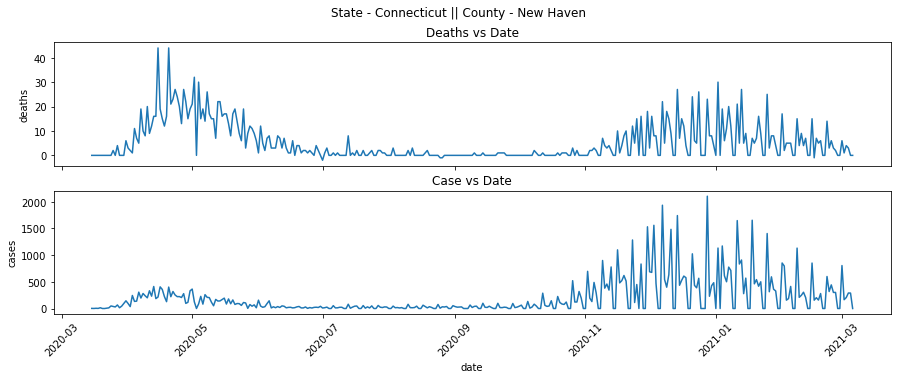

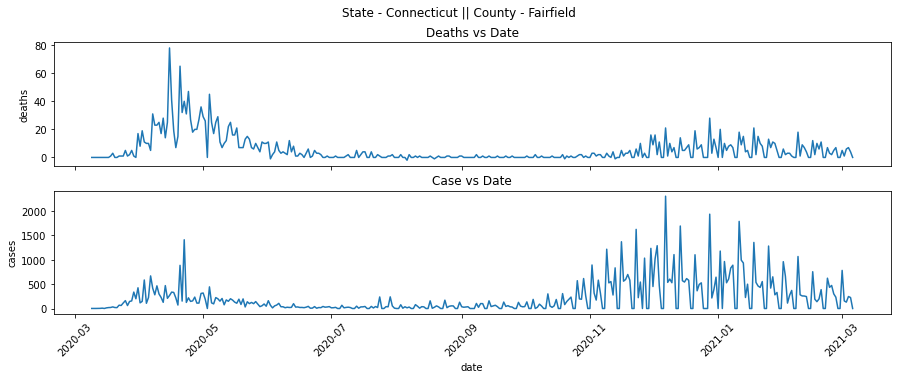

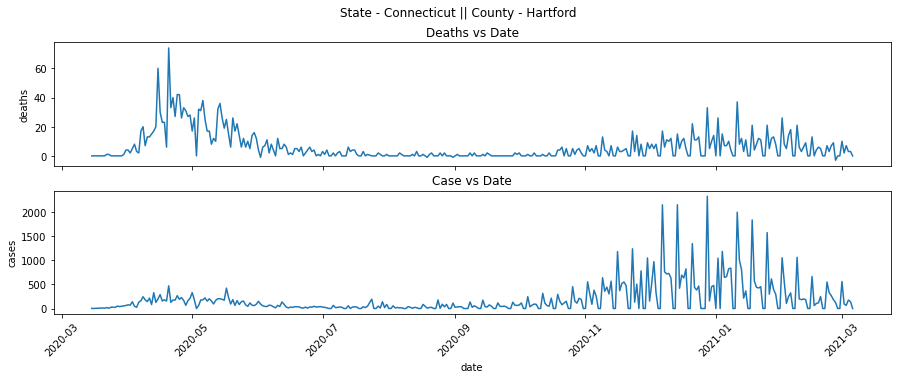

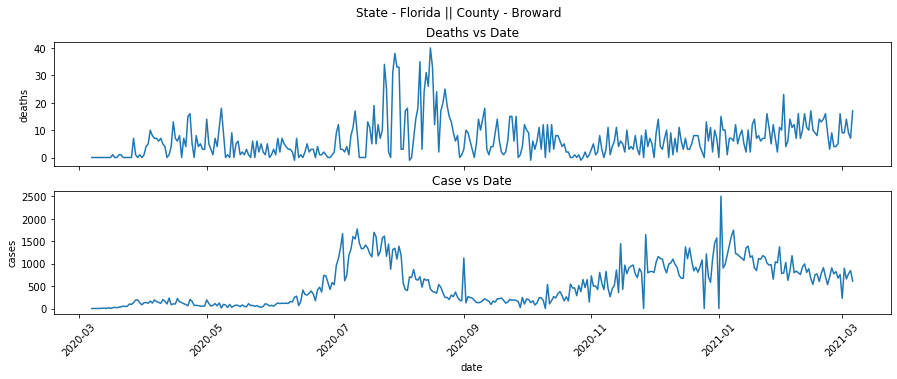

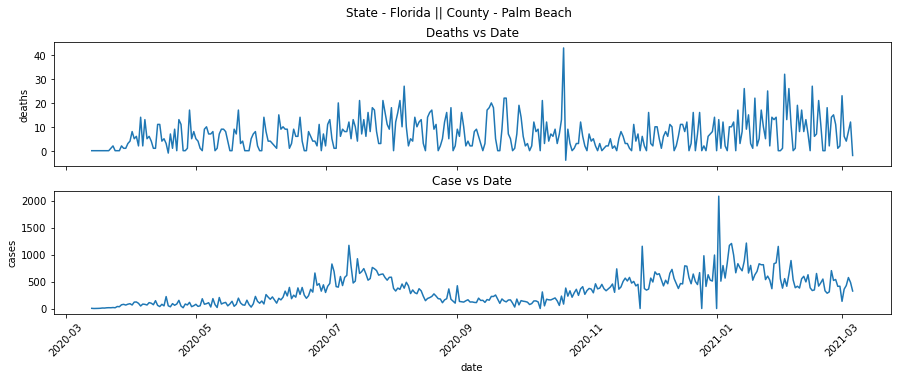

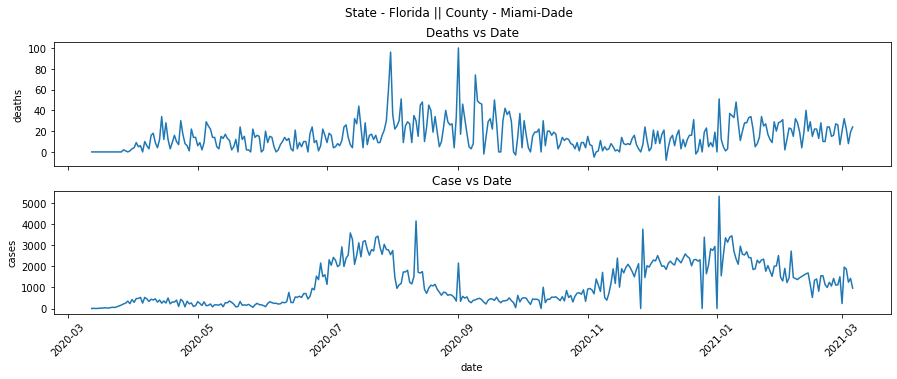

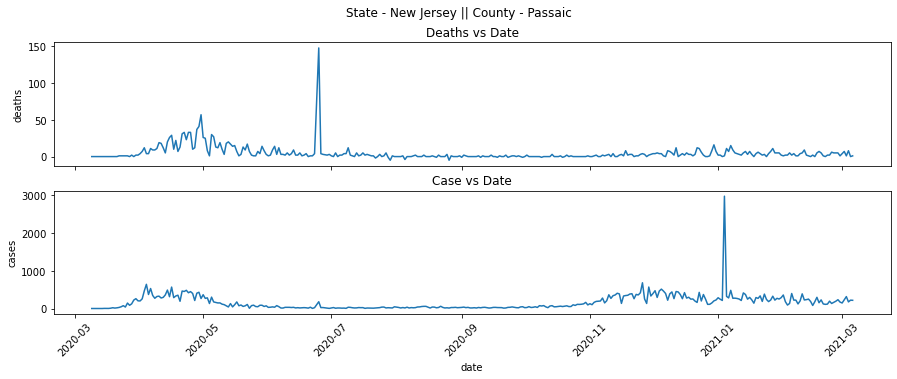

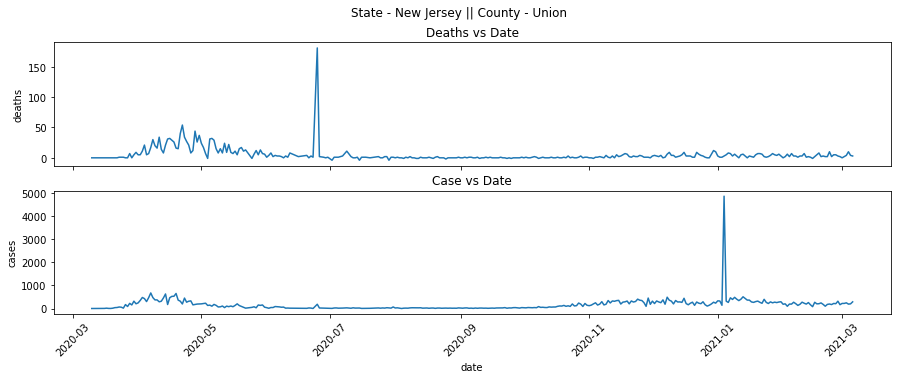

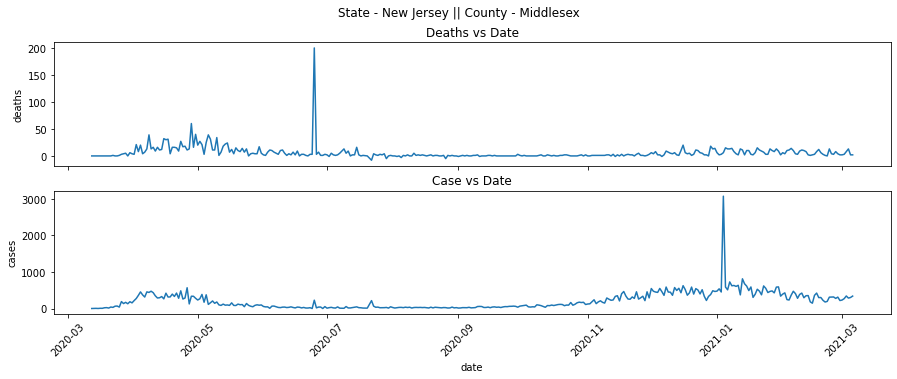

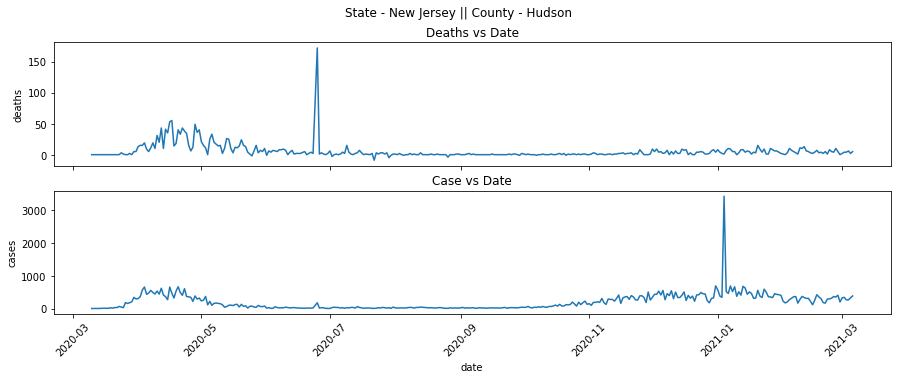

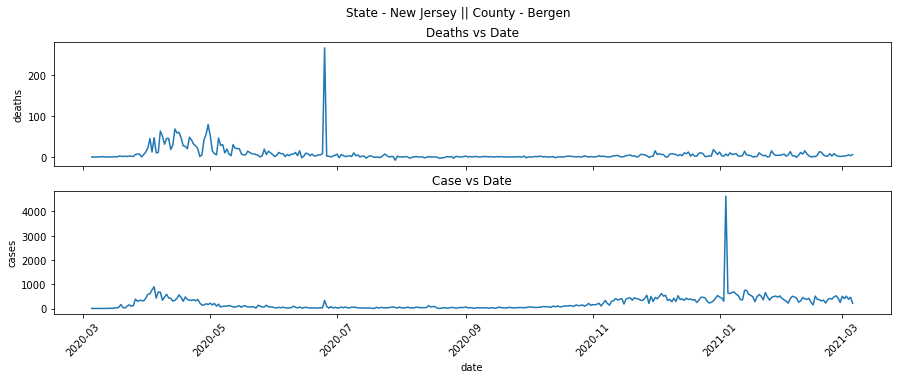

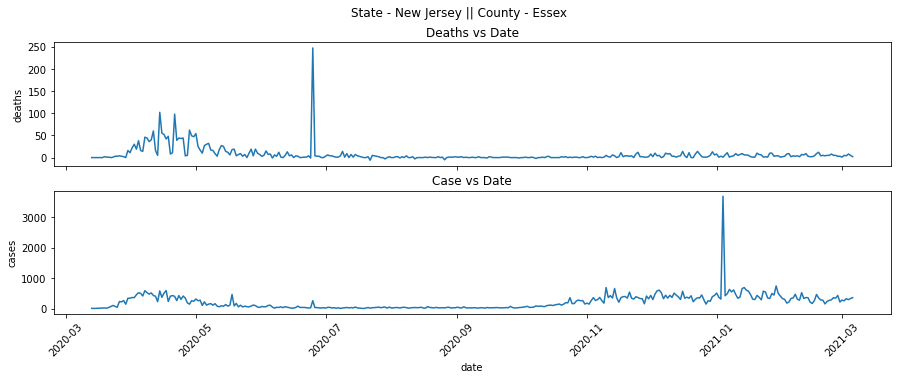

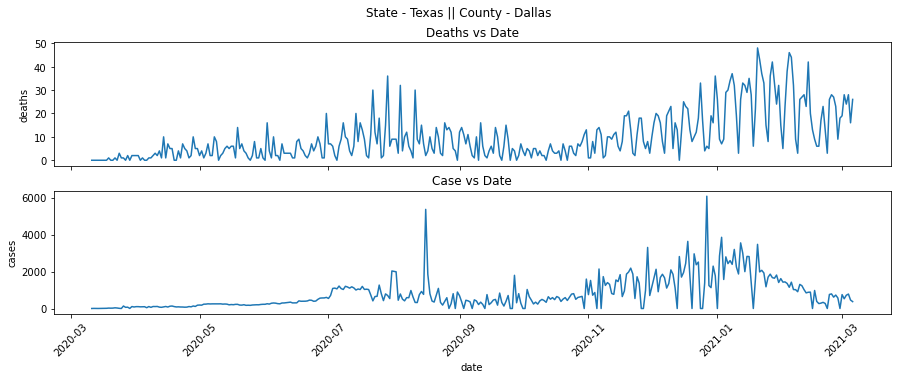

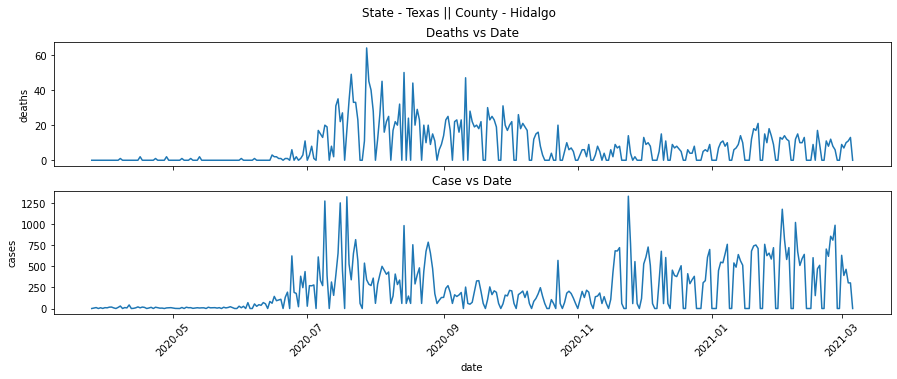

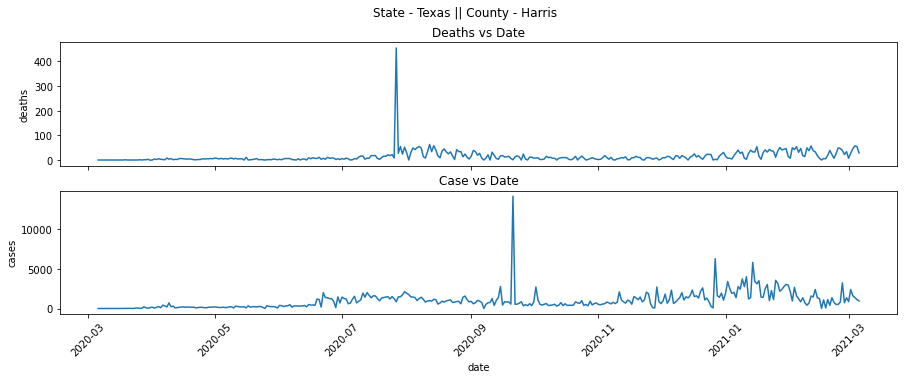

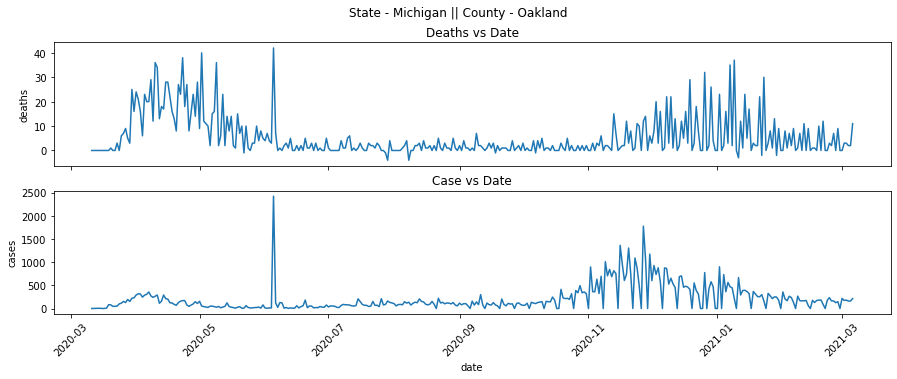

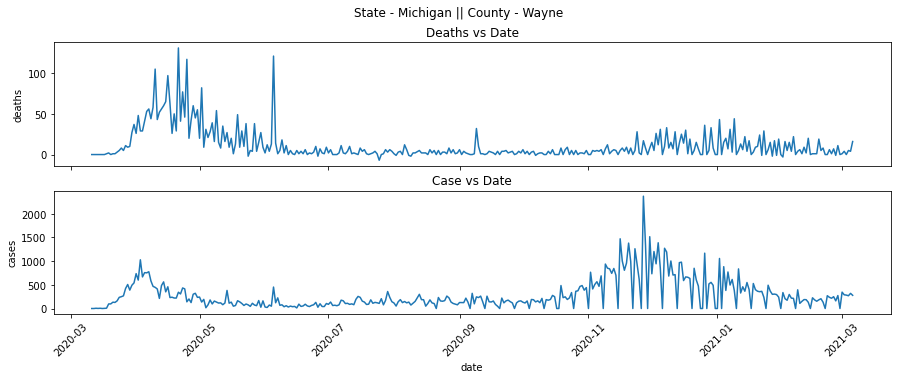

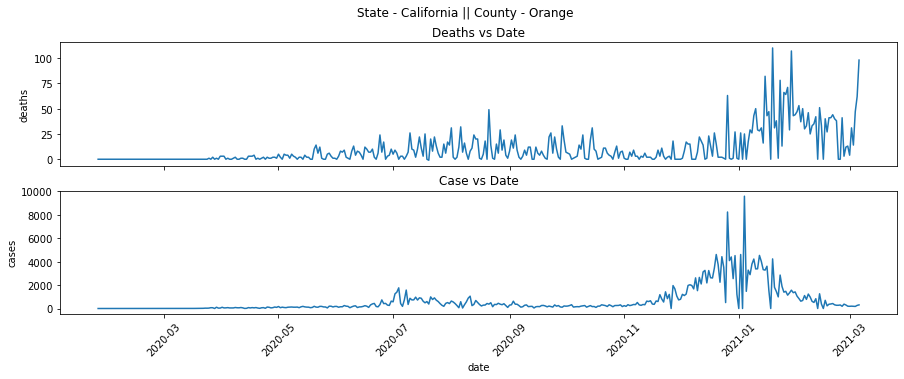

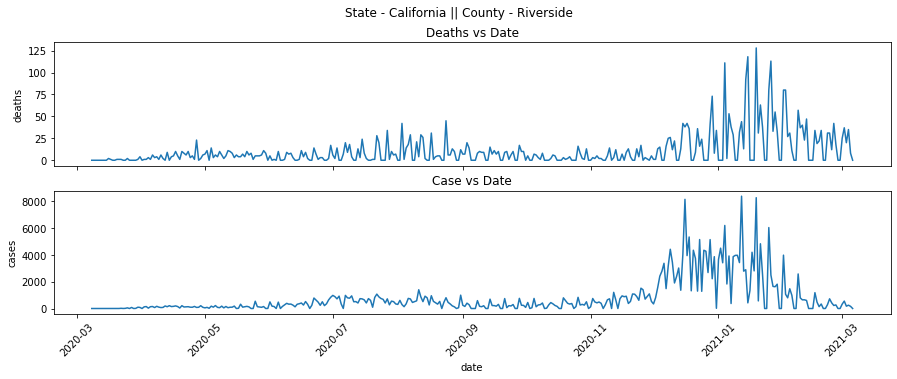

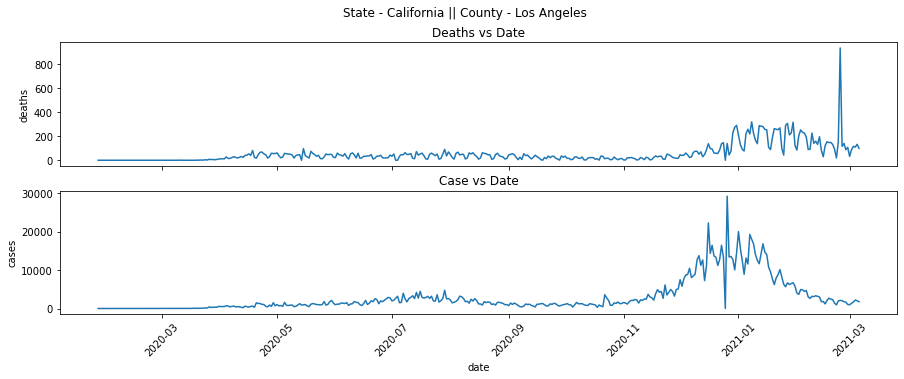

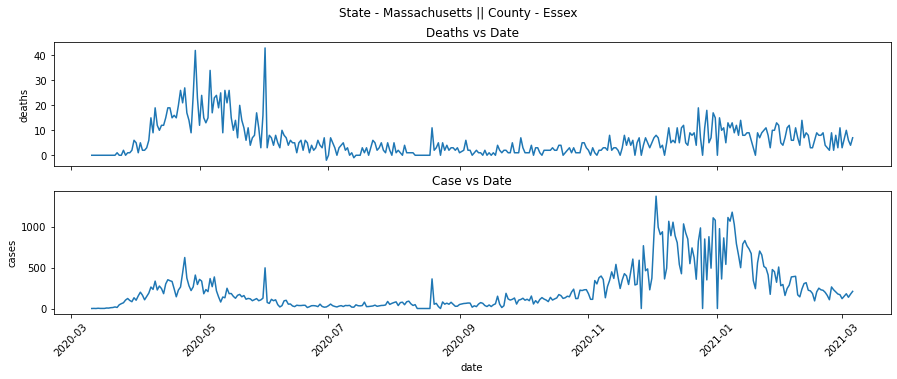

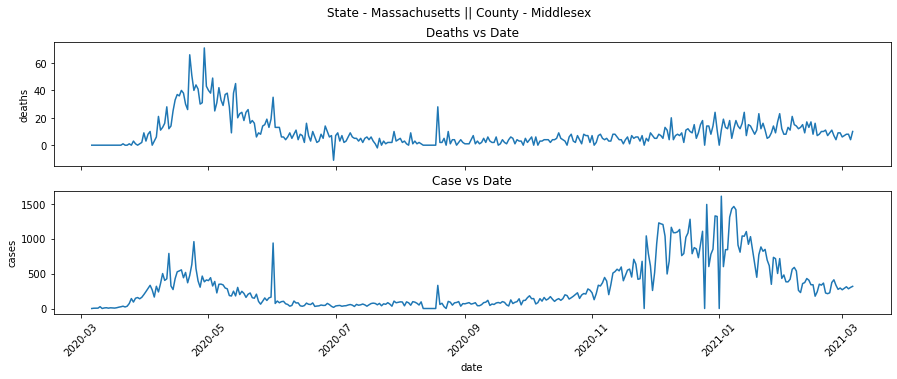

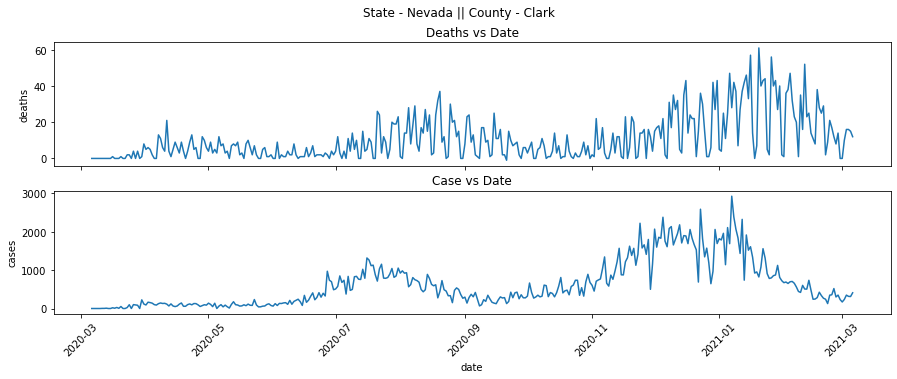

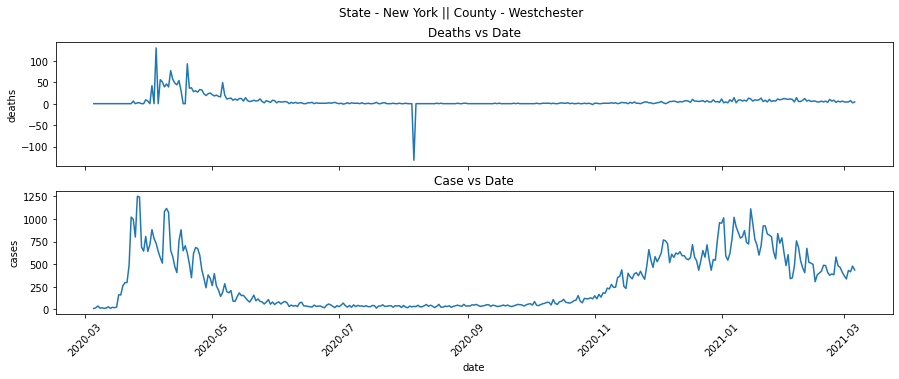

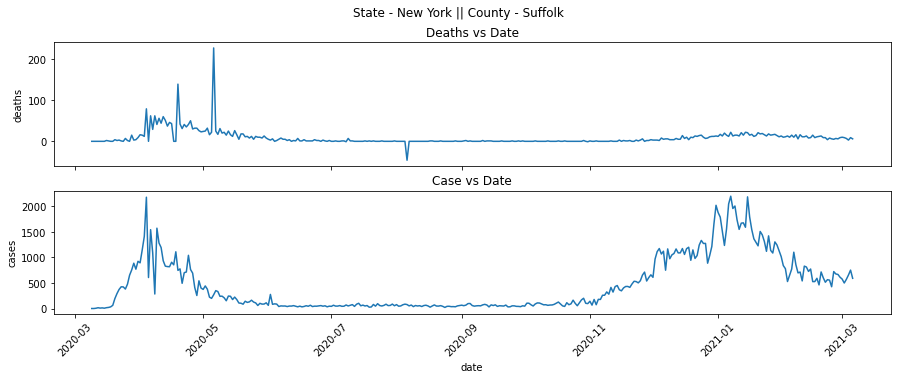

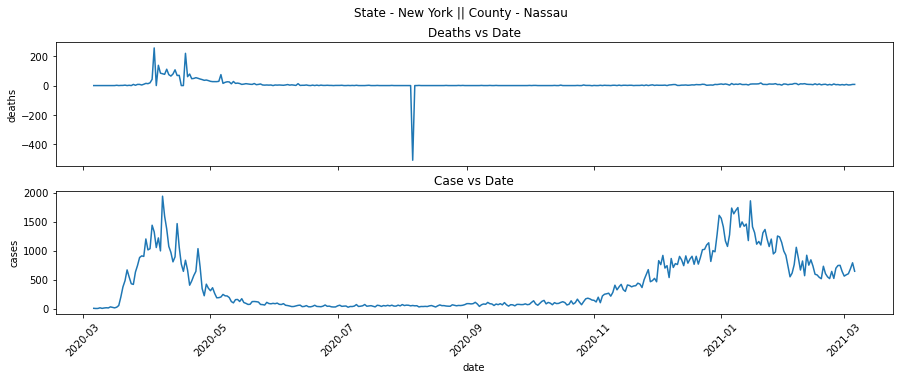

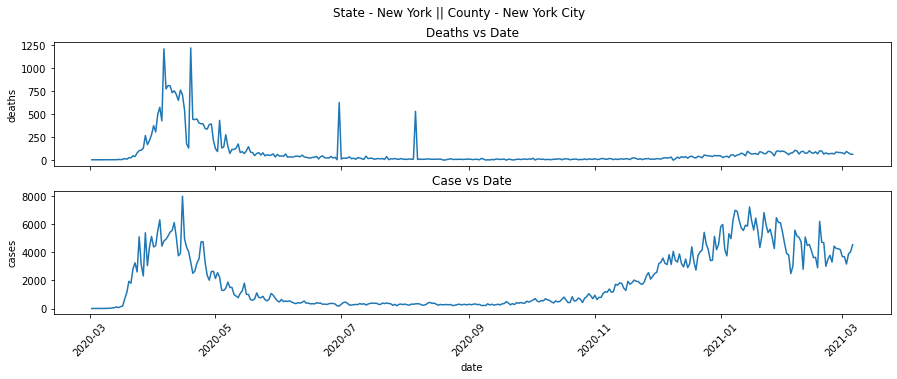

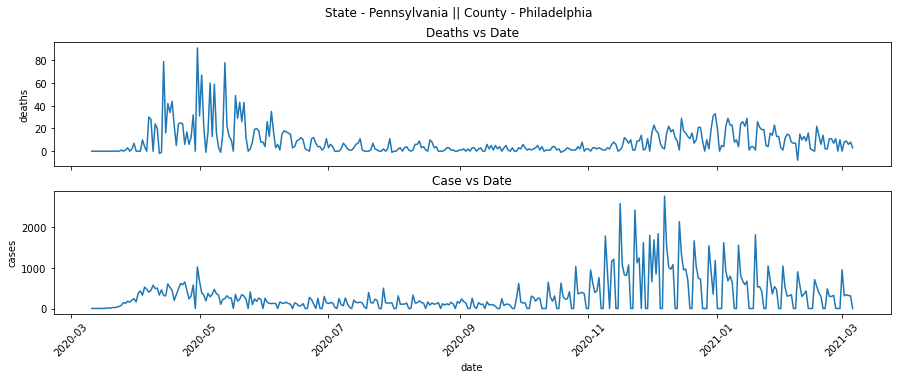

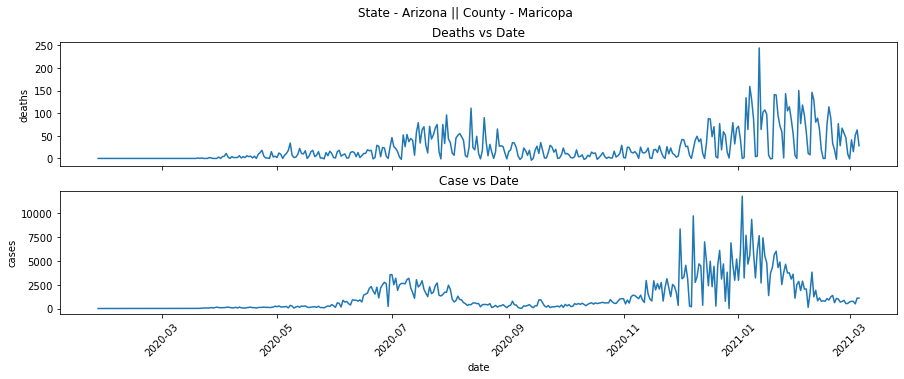

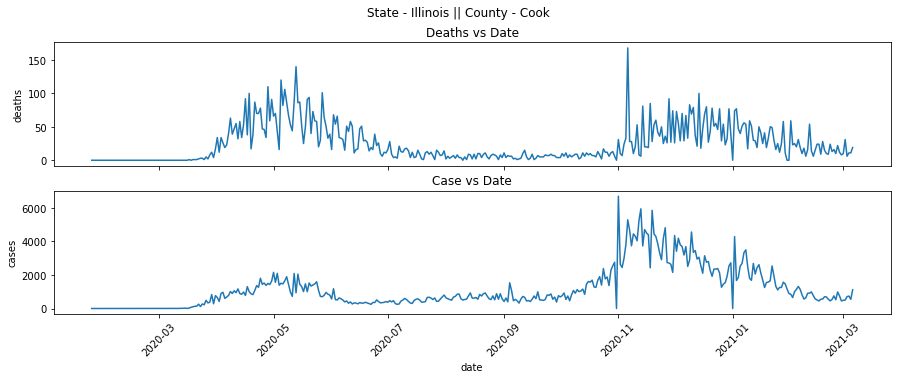

In [22]:
for key, values in d1.items():
    df22 = df2[df2['state'] == key]
    for a in values:
        df33 = df22[df22['county'] == a]
        df33 = df33.groupby(['state','county','date'])[['deaths','cases']].sum()
        df33 = df33.diff(axis=0)
        df333 = df33[df33['deaths'] >= 0]
        df333 = df33[df33['cases'] >= 0]
        dff333 = df333.reset_index()


        titleaa = 'State - ' + key +' || County - ' + a 
        titlea = 'Deaths vs Date'
        titleb = 'Case vs Date'
        # Set default Seaborn style
        fig, axes = plt.subplots(2,1 , figsize=(15, 5), sharex=True)
        fig.suptitle(titleaa)
        sns.lineplot(ax=axes[0], x = 'date', y= 'deaths', data = dff333)
        axes[0].set_title(titlea)
        sns.lineplot(ax=axes[1], x = 'date', y= 'cases', data = dff333)
        axes[1].set_title(titleb)
        # Customize the labels and limits
        plt.xticks(rotation=45)
        # Show TimeSeries
        plt.show()

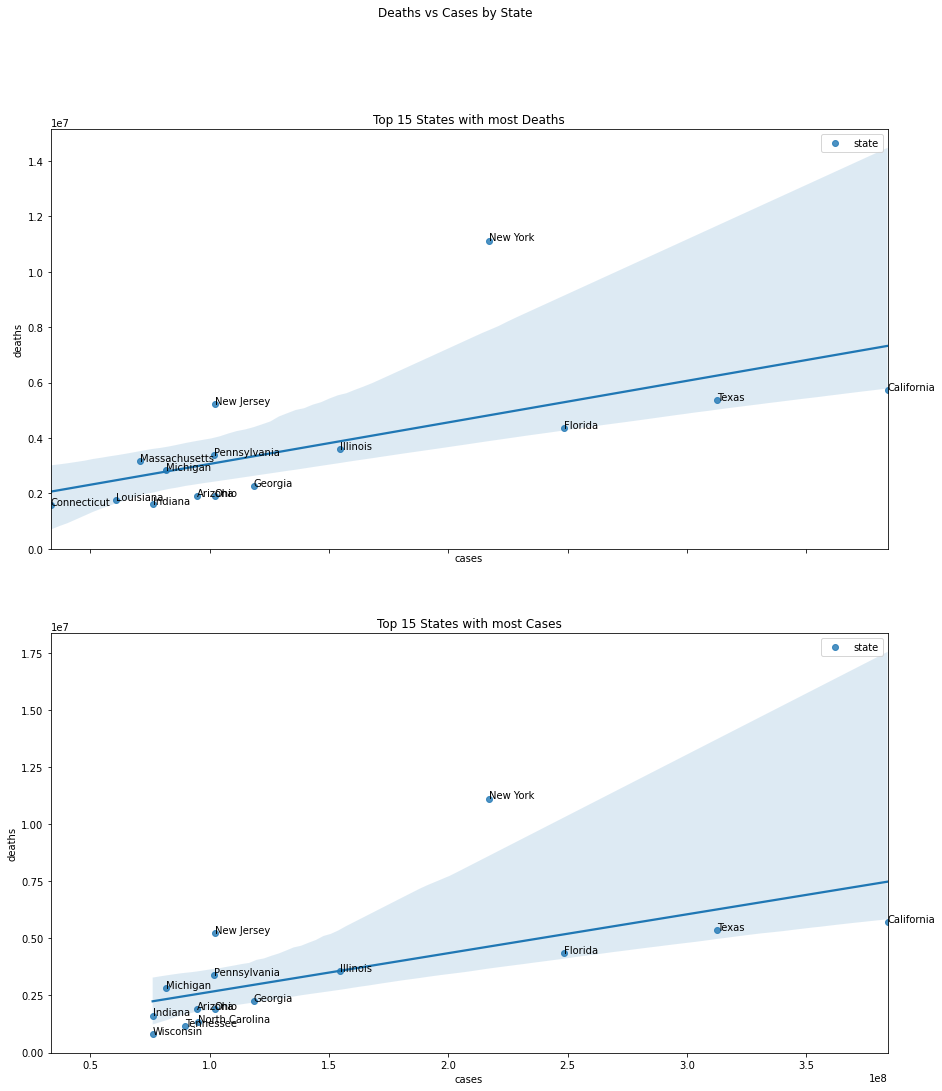

In [23]:
df222 = df

df222_a = df222.groupby(['state'])[['deaths','cases']].sum()
df222_ab = df222_a.sort_values('deaths')
df222_ac = df222_a.sort_values('cases')
df222_ab = df222_ab.reset_index()
df222_ac = df222_ac.reset_index()

df222_ab = df222_ab.tail(15)
df222_ac = df222_ac.tail(15)

titlea = 'Deaths vs Date'
titleb = 'Case vs Date'

# Set default Seaborn style
fig, axes = plt.subplots(2,1 , figsize=(15, 17), sharex = True)
sns.regplot(ax=axes[0], x = 'cases', y= 'deaths', data = df222_ab, label = 'state')
axes[0].legend()

sns.regplot(ax=axes[1], x = 'cases', y= 'deaths', data = df222_ac, label = 'state')
axes[1].legend()

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.1, point['y'], str(point['val']))

    

label_point(df222_ab.cases, df222_ab.deaths, df222_ab.state, axes[0])
label_point(df222_ac.cases, df222_ac.deaths, df222_ac.state, axes[1])

fig.suptitle('Deaths vs Cases by State')
axes[0].set_title('Top 15 States with most Deaths')
axes[1].set_title('Top 15 States with most Cases')
plt.show()

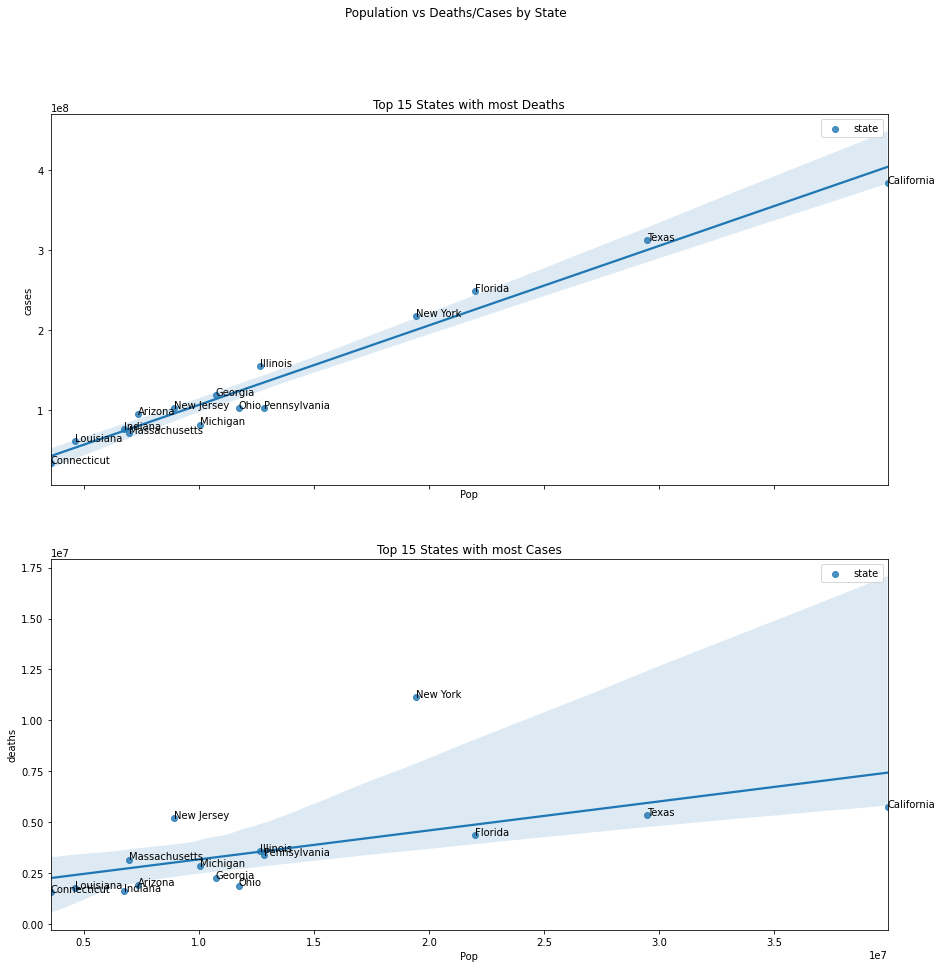

In [24]:
df_state = pd.read_csv('../input/state-data1/csvData (1).csv')
df222_a1 = df222_a.reset_index()
df222_a1 = df222_a1.rename(columns={"state": "State"})
result = pd.merge(df222_a1, df_state, how='inner', on='State')

result1 = result.sort_values('deaths')
result2 = result.sort_values('cases')

result1 = result1.tail(15)
result2 = result2.tail(15)

# Set default Seaborn style
fig, axes = plt.subplots(2,1 , figsize=(15, 15), sharex = True)
sns.regplot(ax=axes[0], x = 'Pop', y= 'cases', data = result1, label = 'state')
axes[0].legend()

sns.regplot(ax=axes[1], x = 'Pop', y= 'deaths', data = result1, label = 'state')
axes[1].legend()

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.1, point['y'], str(point['val']))

    

label_point(result1.Pop, result1.cases, result1.State, axes[0])
label_point(result1.Pop, result1.deaths, result1.State, axes[1])

fig.suptitle('Population vs Deaths/Cases by State')
axes[0].set_title('Top 15 States with most Deaths')
axes[1].set_title('Top 15 States with most Cases')
plt.show()

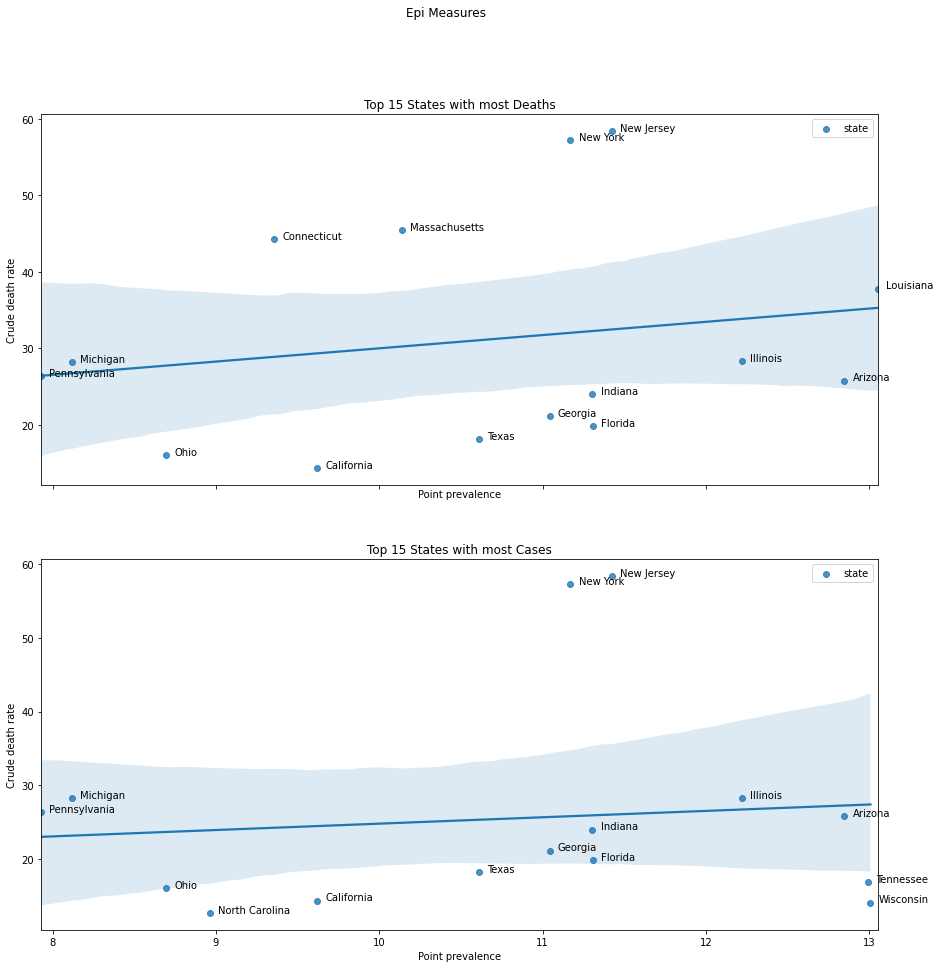

In [25]:
result['Crude death rate'] = result.deaths / result.Pop * 100
result1['Crude death rate'] = result1.deaths / result1.Pop * 100
result2['Crude death rate'] = result2.deaths / result2.Pop * 100

result['Point prevalence'] = result.cases / result.Pop
result1['Point prevalence'] = result1.cases / result1.Pop
result2['Point prevalence'] = result2.cases / result2.Pop

result['case fatality proportion'] = result.deaths / result.cases
result1['case fatality proportion'] = result1.deaths / result1.cases
result2['case fatality proportion'] = result2.deaths / result2.cases

result1 = result1.sort_values('Crude death rate')
result2 = result2.sort_values('Crude death rate')


# Set default Seaborn style
fig, axes = plt.subplots(2,1 , figsize=(15, 15), sharex = True)
sns.regplot(ax=axes[0], x = 'Point prevalence', y= 'Crude death rate', data = result1, label = 'state')
axes[0].legend()

sns.regplot(ax=axes[1], x = 'Point prevalence', y= 'Crude death rate', data = result2, label = 'state')
axes[1].legend()

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']))

    

label_point(result1['Point prevalence'], result1['Crude death rate'], result1.State, axes[0])
label_point(result2['Point prevalence'], result2['Crude death rate'], result2.State, axes[1])

fig.suptitle('Epi Measures')
axes[0].set_title('Top 15 States with most Deaths')
axes[1].set_title('Top 15 States with most Cases')
plt.show()

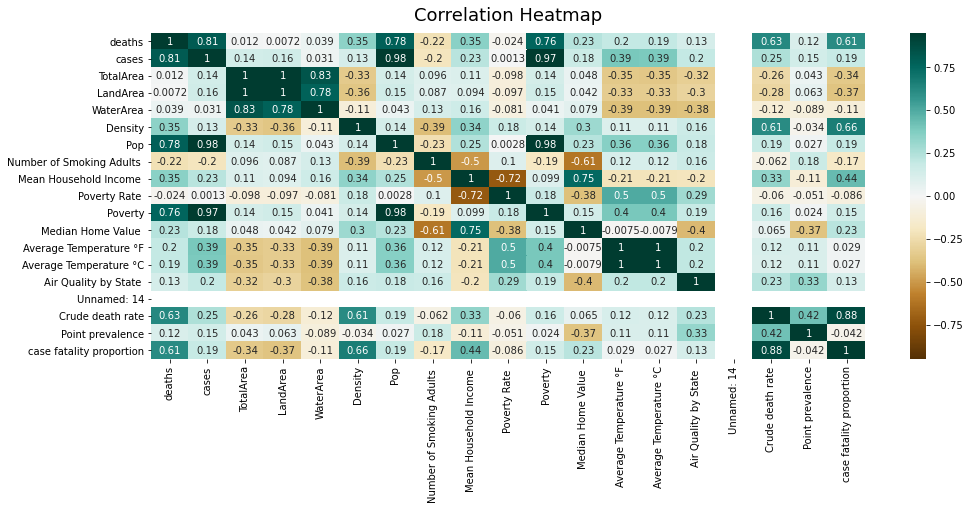

In [26]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(result.corr(), vmin=-0.95, vmax=0.95, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

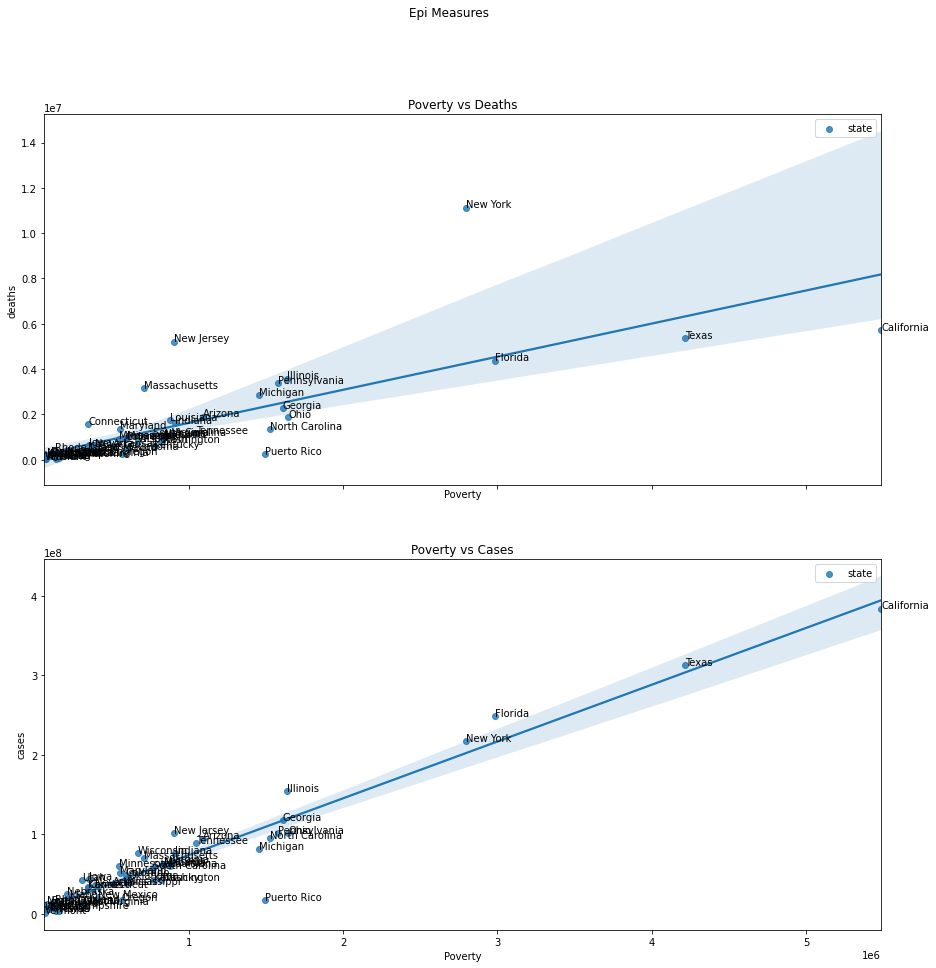

In [27]:
# Set default Seaborn style
fig, axes = plt.subplots(2,1 , figsize=(15, 15), sharex = True)
sns.regplot(ax=axes[0], x = 'Poverty', y= 'deaths', data = result, label = 'state')
axes[0].legend()

sns.regplot(ax=axes[1], x = 'Poverty', y= 'cases', data = result, label = 'state')
axes[1].legend()

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']))

    

label_point(result['Poverty'], result['deaths'], result.State, axes[0])
label_point(result['Poverty'], result['cases'], result.State, axes[1])

fig.suptitle('Epi Measures')
axes[0].set_title('Poverty vs Deaths')
axes[1].set_title('Poverty vs Cases')
plt.show()